# Business Performance Analysis of Procrastinate Pro+ Application


The entertainment app Procrastinate Pro+ has been losing money for the past few months despite huge investments in advertising. The task is to use data on users attracted from May 1 to October 27, 2019 to understand the reasons and help the company get into the black.

***Purpose of the work:***
- Identify the reasons for the ineffectiveness of user acquisition;
- Formulate recommendations for the marketing department.


### Upload data and prepare it for analysis


Let's load data on visits, orders and advertising costs from CSV files into variables.

Let's study the data and perform preprocessing.


#### Importing libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

#### Loading data


In [2]:
visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs = pd.read_csv('costs_info_short.csv')

#### Output of fragments and dataset information


##### Visitor data
According to the visitors' data, it can be noted that:
- no obvious gaps in columns found;
- it is necessary to rename all columns, replacing spaces with underscores and converting characters to lowercase;
- it is necessary to replace the `Session Start` and `Session End` column types with `datetime64[ns]`.


In [3]:
visits.head(5)

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


##### Order details
From the order data it can be seen that:
- no obvious gaps in columns found;
- it is necessary to rename all columns, replacing spaces with underscores and converting characters to lowercase;
- it is necessary to replace the column type `Event Dt` with `datetime64[ns]`.


In [5]:
orders.sample(5)

User Id             Event Dt  Revenue
2105   170668637792  2019-06-01 18:02:29     4.99
6914   918102819635  2019-07-09 19:23:27     4.99
22975   51453505318  2019-10-08 07:58:52     4.99
8969   968963361696  2019-07-22 22:39:44     4.99
35720  901180916748  2019-09-16 22:31:39     4.99

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


##### Expense data
From the expenditure data it can be seen that:
- no obvious gaps in columns found;
- the column name `Channel` must be converted to lower case;
- it is necessary to replace the column type `dt` with _.


In [7]:
costs.sample(5)

dt             Channel    costs
485   2019-09-03      RocketSuperAds    5.525
1302  2019-06-12  OppleCreativeMedia    8.000
69    2019-07-09            FaceBoom  168.300
897   2019-10-25             YRabbit    7.560
1151  2019-07-11             LeapBob    8.610

In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


***Conclusion:***

Based on preliminary data analysis, we can conclude that in all datasets:
- no obvious gaps were found in columns, based on the number of non-zero values;
- it is necessary to convert the column names to lower case and replace spaces with underscores;
- it is necessary to change the type of columns with dates.


#### Data preprocessing.


##### Renaming columns


Let's rename the `visits`, `orders` and `costs` dataset columns, convert them to lowercase and replace spaces with the underscore character `_`.


In [9]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [10]:
orders.columns = ['user_id', 'event_dt', 'revenue']

In [11]:
costs.columns = ['dt', 'channel', 'costs']

##### Gap Analysis
To check the data for gaps in the column, we will perform the following checks:
- we will output all unique values ​​of categorical columns;
- display the earliest and latest values ​​in the date columns;
- we will deduce


###### Visitor data gap analysis


In [12]:
# Visitor region
list(visits.region.unique())

['United States', 'UK', 'France', 'Germany']

In [13]:
# User device
list(visits.device.unique())

['iPhone', 'Mac', 'Android', 'PC']

In [14]:
# Visitor acquisition channel
print(list(visits.channel.unique()))

['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom', 'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner', 'OppleCreativeMedia', 'lambdaMediaAds']


In [15]:
# Date and time of visit
print('First session date and time:', min(visits.session_start))
print('Last session date and time:', max(visits.session_start))

First session date and time: 2019-05-01 00:00:41
Last session date and time: 2019-10-31 23:59:23


###### Analysis of order data gaps


In [16]:
# Order amounts
list(orders.revenue.unique())

[4.99, 5.99, 9.99, 49.99, 19.99]

In [17]:
# Date and time of order
print('First date and time of order:', min(orders.event_dt))
print('Last date and time of order:', max(orders.event_dt))

First date and time of order: 2019-05-01 00:28:11
Last date and time of order: 2019-10-31 23:56:56


###### Analysis of order data gaps


In [18]:
# Advertising campaign date
print('First advertising campaign date:', min(costs.dt))
print('Last advertising campaign date:', max(costs.dt))

First advertising campaign date: 2019-05-01
Last advertising campaign date: 2019-10-27


In [19]:
# Advertising campaign costs
costs.costs.describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

***Conclusion:***

Based on preliminary data analysis, we can conclude that in all datasets:
- no explicit or implicit gaps were found in the dataset columns;
- the range of values ​​in the date columns of all datasets coincides for the period from the beginning of May to the end of October 2019.


##### Analysis for duplicates
Let's analyze all datasets for duplicates.


In [20]:
visits.duplicated().sum()

0

In [21]:
visits.duplicated(subset=['user_id', 'session_start']).sum()

0

In [22]:
orders.duplicated().sum()

0

In [23]:
orders.duplicated(subset=['user_id', 'event_dt']).sum()

0

In [24]:
costs.duplicated().sum()

0

In [25]:
costs.duplicated(subset=['dt', 'channel']).sum()

0

***Conclusion:***

Based on the pre-processing of the data, we can conclude that no obvious or implicit duplicates were found in any datasets.


##### Changing types in date columns
After preliminary data analysis, conclusions were made about the need to replace the date and time column type with `datetime64[ns]`.

For the `dt` column of the advertising expenses dataset, we apply the `dt.date` function to convert the value to a date type.


In [26]:
visits.session_start = pd.to_datetime(visits.session_start)
visits.session_end = pd.to_datetime(visits.session_end)

In [27]:
orders.event_dt = pd.to_datetime(orders.event_dt)

In [28]:
costs.dt = pd.to_datetime(costs.dt).dt.date

***Conclusion:***

The `session_start` and `session_end` columns in the visits dataset and `event_dt` in the orders dataset were converted to type `datetime64[ns]`.


##### Let's add additional columns for the year, month and week of the ad purchase


In [29]:
costs['dt_year'] = pd.to_datetime(costs['dt']).dt.year
costs['dt_month'] = pd.to_datetime(costs['dt']).dt.month
costs['dt_week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

***Conclusion:***

Added columns for year, month and week of ad purchase for further use in analysis.


#### Conclusion of data preprocessing
During the preliminary analysis and preprocessing of the data, the following conclusions and edits were made in the datasets:
- no obvious or implicit gaps were found in any columns of the datasets;
- no obvious or implicit duplicates were found in any columns of the datasets;
- column types with date and time values ​​were converted to the `datetime64[ns]` type;
- the ranges of values ​​in the date and time columns in all datasets match the period (beginning of May to the end of October 2019);
- added columns for year, month and week of advertising purchase for further use in analysis.


### Set up functions to calculate and analyze LTV, ROI, retention and conversion.

Let's write functions for calculating metric values:

- `get_profiles()` — to create user profiles,
- `get_retention()` — to calculate the Retention Rate,
- `get_conversion()` — to calculate conversion,
- `get_ltv()` — to calculate LTV.

And also functions for plotting graphs:

- `filter_data()` — for smoothing data,
- `plot_retention()` — to plot the Retention Rate graph,
- `plot_conversion()` — to plot the conversion graph,
- `plot_ltv_roi` — for visualizing LTV and ROI.


#### Functions for calculating metric values
##### Function for getting user profiles


In [30]:
def get_profiles(sessions, orders, ad_costs):
    # sort sessions by user ID and first visit date
    #  group by user_id and find the first values for session_start, channel, device, and region
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index() # return user_id from the index
    )
  
    # determine the date of the first visit and the first day of the month when this visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.month
    
    # determine if the user is a paying customer
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # group profiles by dt and channel and find the number of unique users by user_id, 
    #  acquired from a specific channel on a specific day
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # calculate the average cost of acquiring new users (acquisition_cost) 
    # for each advertising campaign on a specific day
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # Determine the acquisition cost for each user
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### Functions for calculating the user retention rate (Retention Rate)


In [31]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # add the 'payer' column to the passed dimensions list
    dimensions = ['payer'] + dimensions

    # exclude users who didn't "survive" until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('first_ts <= @last_suitable_acquisition_date')

    # collect raw data for retention calculation
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    # determine the number of days since the user's first visit
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # function to group the table by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # get the retention dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time

##### Functions for calculating user conversion


In [32]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # exclude users who didn't "survive" until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('first_ts <= @last_suitable_acquisition_date')

    # determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # add purchase data to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort if dimensions are empty
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # function to group the table by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each "cell" in the row by the cohort size
        # and get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for the conversion dynamics table, remove 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # get the conversion dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time

##### Function for calculating LTV and ROI


In [33]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who didn't "survive" until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    last_suitable_acquisition_date = pd.to_datetime(last_suitable_acquisition_date)
    result_raw = profiles[profiles['dt'] <= last_suitable_acquisition_date.date()]

    #  add revenue data to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort if dimensions are empty
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # function to group the table by desired features
    def group_by_dimensions(df, dims, horizon_days):        
        # build a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # calculate cumulative revenue
        result = result.fillna(0).cumsum(axis=1)
        # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # merge cohort sizes and the revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # calculate LTV:
        # divide each "cell" in the row by the cohort size
        result = result.div(result['cohort_size'], axis=0)
        # exclude all lifetimes exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        
        # calculate CAC (customer acquisition cost) for each cohort
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        # calculate ROI:
        # divide LTV revenue values by CAC (customer acquisition cost)
        roi = result.div(cac['cac'], axis=0)
        # exclude cohorts without users from the table
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    # get LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
   
    # for LTV and ROI dynamics tables, remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []
        
    
    # get LTV and ROI dynamics tables
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamics table
    )

#### Functions for plotting graphs
##### Function for smoothing a dataframe


In [34]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

##### Function for visualizing Retention Rate


In [35]:
def plot_retention(retention, retention_history, horizon): 
    plt.figure(figsize=(15, 8))

    # exclude cohort sizes and first-day retention
    retention = retention.drop(columns=['cohort_size', 0])

    # if only 'payer' is in the retention table indexes,
    # add a second feature — 'cohort'
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # the plot grid will have two columns and two rows, four cells
    # in the first cell, plot retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime', fontsize=15)
    plt.title('Retention Rate of paying users', fontsize=15)

    # in the second cell, plot retention curves for non-paying users
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.title('Retention Rate of non-paying users', fontsize=15)
    plt.xlabel('Lifetime', fontsize=15)

    # in the third cell, plot retention dynamics for paying users
    ax3 = plt.subplot(2, 2, 3)
    # get column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filter data, build pivot table and plot
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=[horizon-1], aggfunc='mean'
    )
    filter_data(filtered_data, horizon).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition date', fontsize=15)
    plt.title(
        'Retention Rate dynamics of paying users on day {}'.format(horizon), fontsize=15
    )
    
    # in the fourth cell, plot retention dynamics for non-paying users
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # filter data, build pivot table and plot
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=[horizon-1], aggfunc='mean'
    )
    filter_data(filtered_data, horizon).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition date', fontsize=15)
    plt.title(
        'Retention Rate dynamics of non-paying users on day {}'.format(
            horizon
        ), fontsize=15
    )
    
    plt.tight_layout()
    plt.show()

##### Function for visualization Conversion


In [36]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # set the size of the plot grid
    plt.figure(figsize=(12, 4))

    # exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # keep only the required lifetime in the conversion dynamics table
    days = [horizon - 1]
    conversion_history = conversion_history.drop(columns=['cohort_size'])[days]

    # first plot — conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User conversion')

    # second plot — conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # columns of the pivot table will be all index columns except the date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=days, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('User conversion dynamics on day {}'.format(horizon))
   
    plt.tight_layout()
    plt.show()


##### Function for visualizing LTV and ROI


In [37]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    plt.figure(figsize=(20, 12))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # I. LTV curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    ax1.legend(loc='upper left', fontsize='x-large')
    ax1.set_xlabel('Lifetime', fontsize=20)
    ax1.set_title('LTV', fontsize=20)

    # II. LTV dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window)
    filtered_data.plot(grid=True, ax=ax2)
    ax2.legend(loc='upper right', fontsize='x-large')
    ax2.set_xlabel('Acquisition date', fontsize=20)
    ax2.set_title('User LTV dynamics on day {}'.format(horizon), fontsize=20)

    # III. CAC dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    ax3.legend(loc='upper left', fontsize='x-large')
    ax3.set_xlabel('Acquisition date', fontsize=20)
    ax3.set_title('User acquisition cost dynamics', fontsize=20)

    # IV. ROI curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Breakeven level')
    ax4.legend(loc='upper left', fontsize='x-large')
    ax4.set_xlabel('Lifetime', fontsize=20)
    ax4.set_title('ROI', fontsize=20)

    # V. ROI dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    ax5.axhline(y=1, color='red', linestyle='--', label='Breakeven level')
    ax5.legend(loc='upper right', fontsize='x-large')
    ax5.set_xlabel('Acquisition date', fontsize=20)
    ax5.set_title('User ROI dynamics on day {}'.format(horizon), fontsize=20)

    plt.tight_layout()
    plt.show()

### Exploratory data analysis


#### User Profiles
Let's create user profiles. Determine the minimum and maximum dates for attracting users.


In [38]:
profiles = get_profiles(visits, orders, costs)

In [39]:
profiles.sample(5)

user_id            first_ts         channel   device  \
91033   605887854353 2019-08-28 03:47:13         organic      Mac   
110772  737785870520 2019-09-05 14:50:40        FaceBoom      Mac   
42240   280051457688 2019-08-26 05:59:39  WahooNetBanner   iPhone   
29759   197598002697 2019-09-06 16:04:26         organic  Android   
5701     38192320322 2019-06-28 00:43:01         organic      Mac   

               region          dt  month  payer  acquisition_cost  
91033   United States  2019-08-28      8  False          0.000000  
110772  United States  2019-09-05      9  False          1.129139  
42240              UK  2019-08-26      8  False          0.657692  
29759   United States  2019-09-06      9  False          0.000000  
5701    United States  2019-06-28      6   True          0.000000

In [40]:
print('First user acquisition date:', min(profiles.dt).strftime('%Y-%m-%d'))
print('Last user acquisition date:', max(profiles.dt).strftime('%Y-%m-%d'))

First user acquisition date: 2019-05-01
Last user acquisition date: 2019-10-27


In [41]:
print(f'Total number of users: {profiles.payer.count()}')
print(f'Number of paying users: {profiles.payer.sum()}')
print(f'Share of paying users: {(profiles.payer.mean() * 100):.1f}%')

Total number of users: 150008
Number of paying users: 8881
Share of paying users: 5.9%


In [42]:
print(
    'Average advertising cost per user:', \
    profiles.query('channel != "organic"').acquisition_cost.mean().round(2), 'dollars'
)

Average advertising cost per user: 1.13 dollars


***Conclusion:***

A user profile of the application was compiled, based on which we can draw initial conclusions:
- users were attracted from May 1 to October 27, 2019, as specified in the task;
- the share of paying users is 5.9%;
- The average cost of advertising per user is $1.13.


#### User region
Let's find out from which countries users come to the application and which country has the most paying users. Let's build a table reflecting the number of users and the share of paying users from each country.


In [43]:
region_counts = (
    profiles
    .groupby('region')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .rename(columns={'user_id': 'count', 'payer': 'payers_perc'})
    .sort_values(by='count', ascending=False)
)
region_counts.payers_perc *= 100

In [44]:
region_counts.round(2)

count  payers_perc
region                            
United States  100002         6.90
UK              17575         3.98
France          17450         3.80
Germany         14981         4.11

Using this table, we will construct a pie chart of users and a horizontal bar graph of the share of paying users.

From it we see that users from the USA make up two thirds of all users of the application (100,002 people). Also, the USA is the leader in the share of paying users (6.9%).

There are the fewest users from Germany among all the others (14,981 people).


In [45]:
def pie_pct_text(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

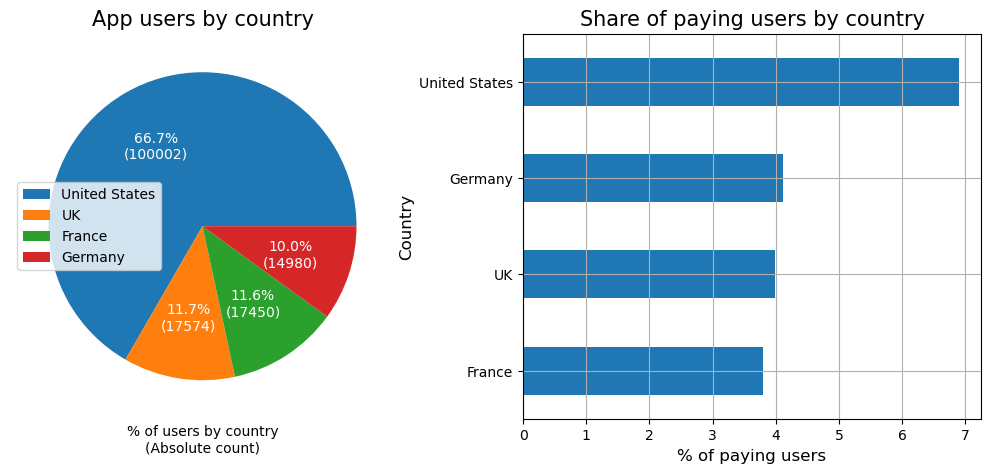

In [46]:
plt.figure(figsize=(13, 5))

ax1 = plt.subplot(1, 2, 1)
region_counts['count'].plot.pie(
    grid=True, 
    ax=ax1, 
    autopct=lambda pct: pie_pct_text(pct, region_counts['count']),
    textprops=dict(color="w"),
)
plt.title('App users by country', fontsize=15)
ax = ax1.legend()
ax = ax1.set_ylabel('')
ax = ax1.set_xlabel('% of users by country\n(Absolute count)')

ax2 = plt.subplot(1, 2, 2)
region_counts['payers_perc'].sort_values().plot.barh(grid=True, ax=ax2)
plt.title('Share of paying users by country', fontsize=15)
ax = ax2.set_ylabel('Country', fontsize=12)
ax = ax2.set_xlabel('% of paying users', fontsize=12)

***Conclusion:***
- US users account for two-thirds of all app users (100,002 people);
- The USA is the leader in the share of paying users (9.9%);
- France, Germany and the UK have roughly equal numbers of users, but Germany has a higher proportion of paying users.


#### User device

We will find out what devices customers use and what devices paying users prefer. We will also build a table showing the number of users and the share of paying users for each device.


In [47]:
device_counts = (
    profiles
    .groupby('device')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .rename(columns={'user_id': 'count', 'payer': 'payers_perc'})
    .sort_values(by='count', ascending=False)
)
device_counts.payers_perc *= 100

In [48]:
device_counts.round(2)

count  payers_perc
device                     
iPhone   54479         6.21
Android  35032         5.85
PC       30455         5.05
Mac      30042         6.36

Using this table, we will construct a pie chart of users and a horizontal bar chart of the share of paying users by device.

From this we see that iPhone users are the largest among other device users (36.3% of users). The other devices have approximately equal proportions of users.

However, we see that the largest share of paying users on devices are Mac owners (6.36%).


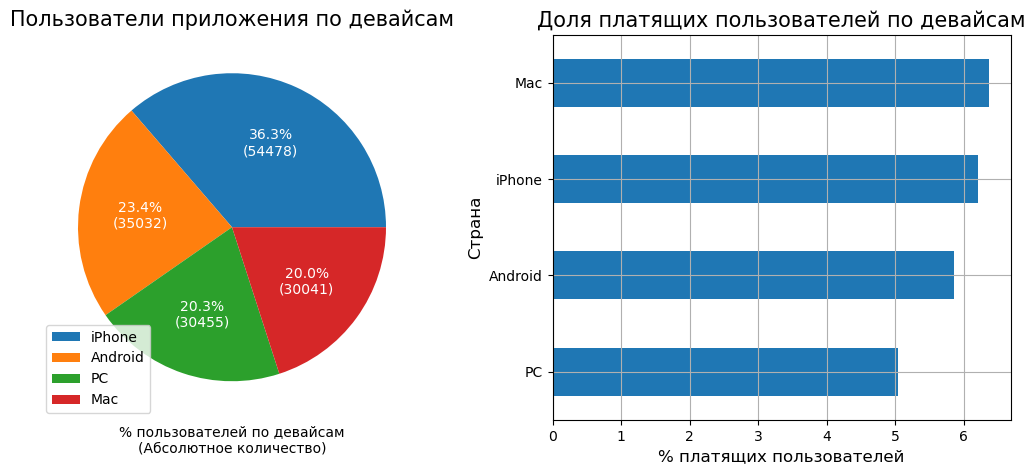

In [49]:
plt.figure(figsize=(13, 5))

ax1 = plt.subplot(1, 2, 1)
device_counts['count'].plot.pie(
    grid=True, 
    ax=ax1, 
    autopct=lambda pct: pie_pct_text(pct, device_counts['count']),
    textprops=dict(color="w"),
)
plt.title('Пользователи приложения по девайсам', fontsize=15)
ax = ax1.legend()
ax = ax1.set_ylabel('')
ax = ax1.set_xlabel('% пользователей по девайсам\n(Абcолютное количество)')

ax2 = plt.subplot(1, 2, 2)
device_counts['payers_perc'].sort_values().plot.barh(grid=True, ax=ax2)
plt.title('Доля платящих пользователей по девайсам', fontsize=15)
ax = ax2.set_ylabel('Страна', fontsize=12)
ax = ax2.set_xlabel('% платящих пользователей', fontsize=12)

***Conclusion:***
- iPhone users are the largest number among users of other devices (36.3% of users);
- On other devices (Mac, Android, PC) there is approximately an equal number of users (20-23.4%);
- The largest share of paying users on devices are Mac owners (7.6%).


#### Attraction channel


Let's study the advertising sources of attraction and determine the channels from which the largest number of paying users came. Let's build a table reflecting the number of users and the share of paying users for each attraction channel.


In [50]:
channel_counts = (
    profiles
    .groupby('channel')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .rename(columns={'user_id': 'count', 'payer': 'payers_perc'})
    .sort_values(by='count', ascending=False)
)
channel_counts.payers_perc *= 100

In [51]:
channel_counts.round(2).sort_values(by='payers_perc', ascending=False)

count  payers_perc
channel                               
FaceBoom            29144        12.20
AdNonSense           3880        11.34
lambdaMediaAds       2149        10.47
TipTop              19561         9.60
RocketSuperAds       4448         7.91
WahooNetBanner       8553         5.30
YRabbit              4312         3.83
MediaTornado         4364         3.57
LeapBob              8553         3.06
OppleCreativeMedia   8605         2.71
organic             56439         2.06

Using this table, we will construct horizontal bar graphs of the number of users and the share of paying users by attraction channels.


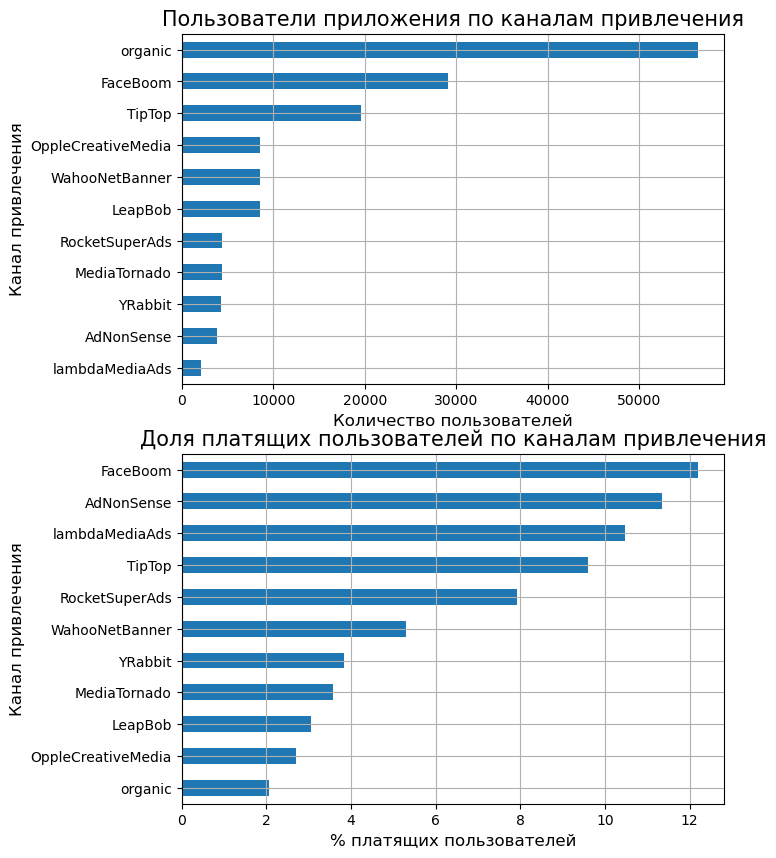

In [52]:
plt.figure(figsize=(7, 10))

ax1 = plt.subplot(2, 1, 1)
channel_counts['count'].sort_values().plot.barh(grid=True, ax=ax1)
plt.title('Пользователи приложения по каналам привлечения', fontsize=15)
ax = ax1.set_ylabel('Канал привлечения', fontsize=12)
ax = ax1.set_xlabel('Количество пользователей', fontsize=12)

ax2 = plt.subplot(2, 1, 2)
channel_counts['payers_perc'].sort_values().plot.barh(grid=True, ax=ax2)
plt.title('\nДоля платящих пользователей по каналам привлечения', fontsize=15)
ax = ax2.set_ylabel('Канал привлечения', fontsize=12)
ax = ax2.set_xlabel('% платящих пользователей', fontsize=12)

#### Correlation between region and user device


Let's analyze the correlation between the user's region and their device to find out where and what device is used more often. From the table you can see that in the US they use iPhone more often, in Europe they equally prefer to use PC and Android smartphones.


In [53]:
profiles.pivot_table(
    index=['device'], columns='region', values='user_id', aggfunc='nunique', fill_value=0
).style.background_gradient(axis=None)

#### Correlation between region and acquisition channel


Let's analyze the correlation between the user's country and the channel through which they are attracted.
From the table you can see that:
- 5 different advertising campaigns are used for Europe and the USA;
- The two most actively used channels for promotion `FaceBoom` and `TipTop` are located in the USA.


In [54]:
region_channels = profiles.pivot_table(index=['channel'], columns='region', values='user_id', aggfunc='nunique', fill_value=0) \
    .drop('organic', axis=0) \
    .sort_values(by='United States', ascending=False) \
    .style.background_gradient(axis=None)
region_channels

***Conclusion:***

Based on the table and graphs of the number of users and the share of paying users by acquisition channels, the following conclusions can be made:
- the largest share of users came organically through friends or search engines (56,439 people), however, the share of paying users is lower than that of paid acquisition channels (2%);
- there are channels with a relatively small reach of attraction, but with a high share of paying users, namely `lambdaMediaAds` (10.5%), `AdNonSense` (11.3%), `RocketSuperAds` (7.9%);

Attraction channels are clearly divided by country:
- to attract users from the USA, the channels `FaceBoom`, `TipTop`, `RocketSuperAds`, `MediaTornado`, `YRabbit` are used;
- In Europe the channels `OppleCreativeMedia`, `LeapBob`, `WahooNetBanner`, `AdNonSense`, `lambdaMediaAds` are used.

In the US, iPhones are used more often, while in Europe, PCs and Android smartphones are equally preferred.


***Recommendations:***

In priority order it is necessary to consider channels of attraction for promotion, the share of paying users of which exceeds more than 6.5% (the total share of paying users). In particular, it is necessary to pay more attention to such channels as `lambdaMediaAds`, `AdNonSense`, `RocketSuperAds`, since for a good share of paying users, they set a small coverage of users.

Also, due to the low percentage of paying users coming organically, it's worth looking at ProcrastinatePro+'s app store page for improvements.


### Marketing


#### Total amount of expenses and by attraction channels


The total marketing expenses, based on the calculation, are $105,497.3.


In [55]:
total_costs = costs.costs.sum()
total_costs.round(2)

105497.3

Let's calculate and derive expenses and share of expenses by advertising companies and region (USA and Europe). Note that we do not spend any funds for organic attraction.


In [56]:
usa_channels = ['FaceBoom','TipTop', 'RocketSuperAds', 'MediaTornado', 'YRabbit']
costs['region'] = costs.channel.isin(usa_channels).map({True: 'United States', False: 'Europe'})
channel_costs = costs.groupby('channel').agg({'costs': 'sum', 'region': 'first'})
channel_costs = channel_costs.sort_values(by='costs', ascending=False)

In [57]:
channel_costs.costs

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

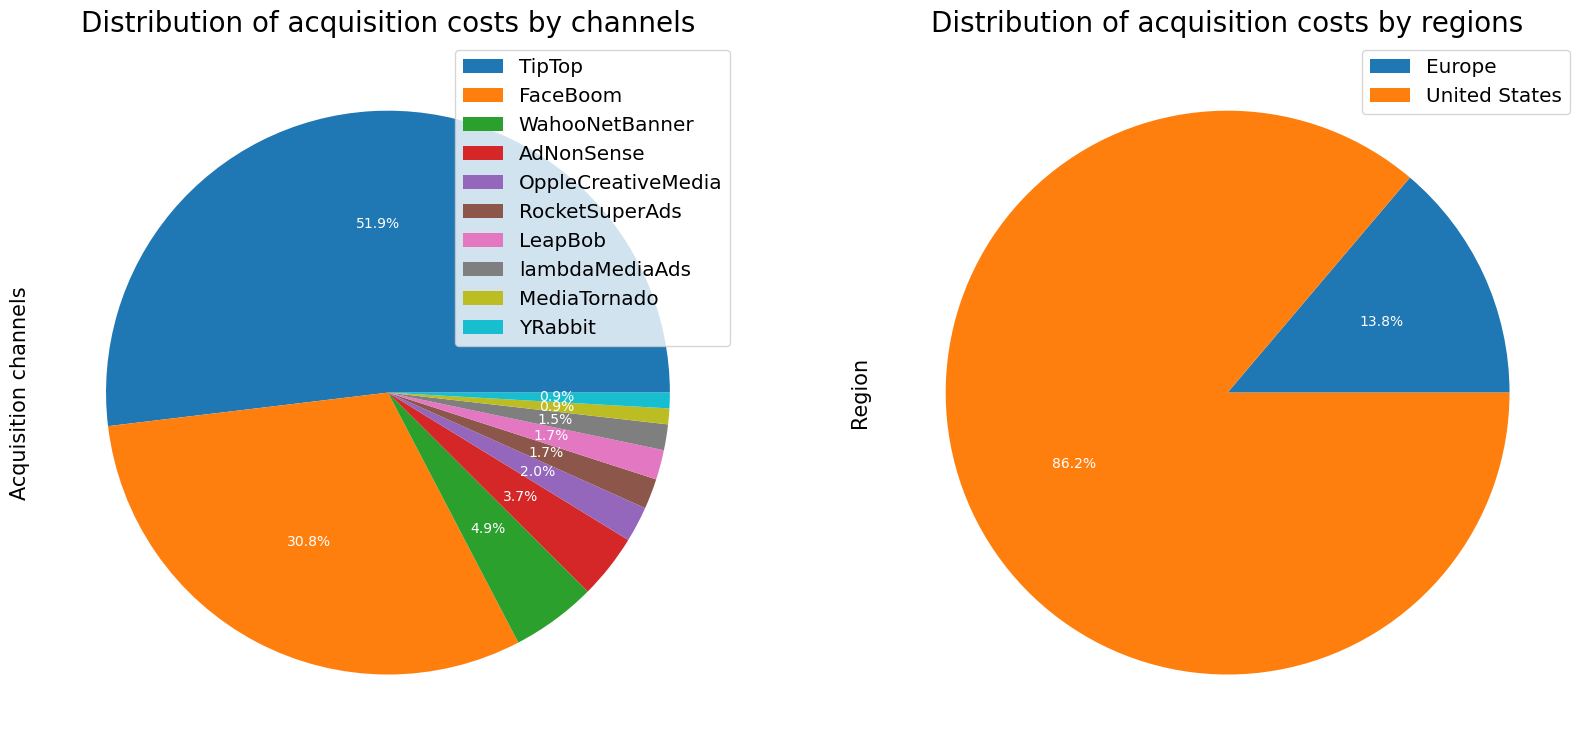

In [58]:
plt.figure(figsize=(16, 8))

ax1 = plt.subplot(1, 2, 1)
channel_costs.costs.plot.pie(
    ax = ax1,  
    autopct=lambda pct: "{:.1f}%".format(pct), 
    textprops=dict(color="w")
)
ax1.set_title('Distribution of acquisition costs by channels', fontsize=20)
ax1.set_ylabel('Acquisition channels', fontsize=15)
ax1.legend(loc='upper right', fontsize='x-large') 

ax2 = plt.subplot(1, 2, 2)
channel_costs.groupby('region').costs.sum().plot.pie(
    ax = ax2,
    autopct=lambda pct: "{:.1f}%".format(pct), 
    textprops=dict(color="w")
)
ax2.set_title('Distribution of acquisition costs by regions', fontsize=20)
ax2.set_ylabel('Region', fontsize=15)
ax2.legend(loc='upper right', fontsize='x-large') 

plt.tight_layout()
plt.show()

***Conclusion:***

- Total expenses on advertising campaigns for the six months of infusion amount to $105,497.3;
- The US accounts for 86.2% of all user acquisition costs, with the two main campaigns being `TipTop` (more than 54 thousand attracted users; 51.9%), `FaceBoom` (more than 32 thousand users; 30.8%).


#### Dynamics of expenses by attraction channels


Let's build tables and graphs
Dynamics of advertising spending in the US and Europe by week in 2019.


In [59]:
channel_costs_by_week = pd.pivot_table(
    costs,
    index=['region', 'channel'],
    columns='dt_week',
    values='costs',
    aggfunc='sum'
)
last_week = max(channel_costs_by_week.columns)
channel_costs_by_week = channel_costs_by_week.sort_values(by=last_week, ascending=False)

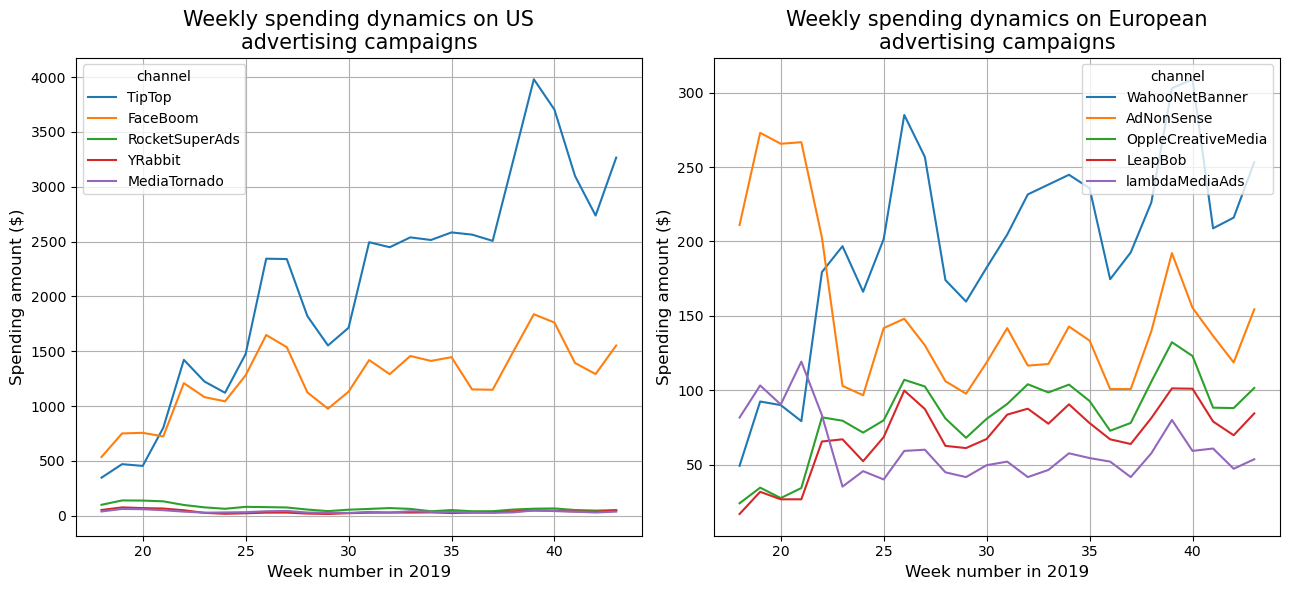

In [60]:
plt.figure(figsize=(16, 8))

ax1 = plt.subplot(1, 2, 1)
channel_costs_by_week.query('region == "United States"').droplevel('region').T.plot(grid=True, figsize=(13, 6), ax=ax1)
res = ax1.set_title('Weekly spending dynamics on US\nadvertising campaigns', fontsize=15)
res = ax1.set_xlabel('Week number in 2019', fontsize=12)
res = ax1.set_ylabel('Spending amount ($)', fontsize=12)


ax2 = plt.subplot(1, 2, 2)
channel_costs_by_week.query('region == "Europe"').droplevel('region').T.plot(grid=True, figsize=(13, 6), ax=ax2)
res = ax2.set_title('Weekly spending dynamics on European\nadvertising campaigns', fontsize=15)
res = ax2.set_xlabel('Week number in 2019', fontsize=12)
res = ax2.set_ylabel('Spending amount ($)', fontsize=12)

plt.tight_layout()
plt.show()

Let's build a table and graph of the dynamics of expenses on advertising campaigns by month in 2019.


In [61]:
channel_costs_by_month = pd.pivot_table(
    costs,
    index=['region', 'channel'],
    columns='dt_month',
    values='costs',
    aggfunc='sum'
)
last_month = max(channel_costs_by_month.columns)
channel_costs_by_month = channel_costs_by_month.sort_values(by=last_month, ascending=False)
months = dict(enumerate(calendar.month_abbr))
channel_costs_by_month.columns = list(months[i] for i in channel_costs_by_month.columns)

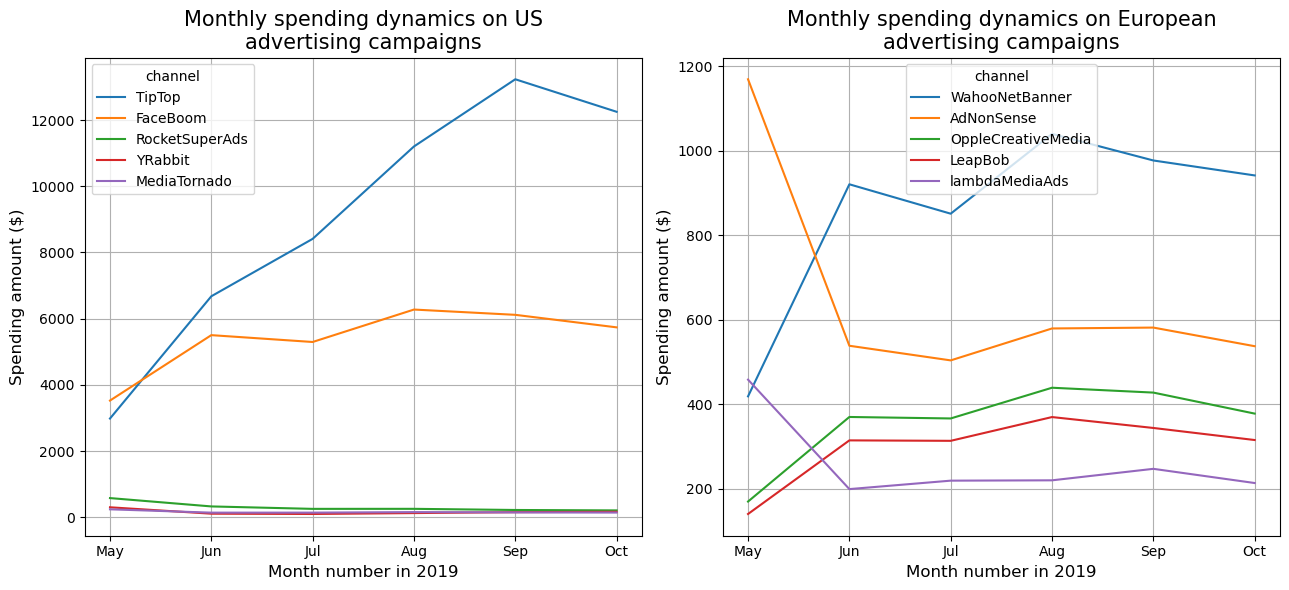

In [62]:
plt.figure(figsize=(16, 8))

ax1 = plt.subplot(1, 2, 1)
channel_costs_by_month.query('region == "United States"').droplevel('region').T.plot(grid=True, figsize=(13, 6), ax=ax1)
res = ax1.set_title('Monthly spending dynamics on US\nadvertising campaigns', fontsize=15)
res = ax1.set_xlabel('Month number in 2019', fontsize=12)
res = ax1.set_ylabel('Spending amount ($)', fontsize=12)


ax2 = plt.subplot(1, 2, 2)
channel_costs_by_month.query('region == "Europe"').droplevel('region').T.plot(grid=True, figsize=(13, 6), ax=ax2)
res = ax2.set_title('Monthly spending dynamics on European\nadvertising campaigns', fontsize=15)
res = ax2.set_xlabel('Month number in 2019', fontsize=12)
res = ax2.set_ylabel('Spending amount ($)', fontsize=12)

plt.tight_layout()
plt.show()

***Conclusion:***

Campaign spending by month is growing every month due to the constant increase in spending on `TipTop` and `FaceBoom` advertising.

For the TipTop campaign, monthly advertising costs varied from $2,981 to $13,232.
For the FaceBoom campaign, monthly advertising costs ranged from $3,524 to $6,274.

No more than $1070 was spent on other advertising campaigns (in May on the `AdNonSense` campaign).

Also, according to the dynamics of advertising expenses for TipTop and FaceBoom by week, local peaks can be seen (weeks 22, 26, 27, 39), followed by a decline in expenses. This behavior is most likely due to an impulsive injection of advertising.


#### Cost of attracting one user by attraction channels


Let's calculate the average cost of attracting one user for each advertising channel.


In [63]:
channel_acq_cost = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).acquisition_cost
channel_acq_cost = channel_acq_cost.sort_values(ascending=False)

In [64]:
channel_acq_cost

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

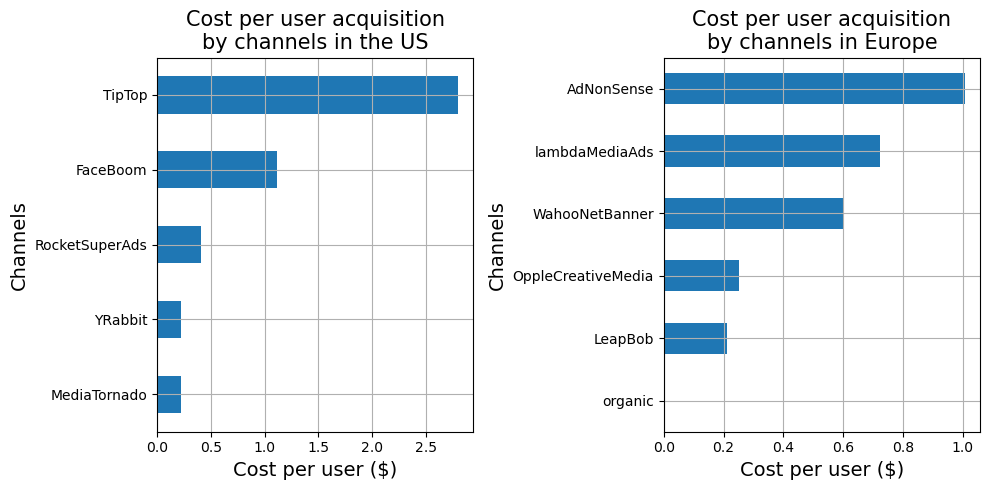

In [65]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(1, 2, 1)
channel_acq_cost[channel_acq_cost.index.isin(usa_channels)].sort_values(ascending=True) \
    .plot(kind='barh', figsize=(10, 5), grid=True, ax=ax1)
res = ax1.set_title("Cost per user acquisition\nby channels in the US", fontsize=15)
res = ax1.set_xlabel("Cost per user ($)", fontsize=14)
res = ax1.set_ylabel("Channels", fontsize=14)

ax2 = plt.subplot(1, 2, 2)
channel_acq_cost[~channel_acq_cost.index.isin(usa_channels)].sort_values(ascending=True) \
    .plot(kind='barh', figsize=(10, 5), grid=True, ax=ax2)
res = ax2.set_title("Cost per user acquisition\nby channels in Europe", fontsize=15)
res = ax2.set_xlabel("Cost per user ($)", fontsize=14)
res = ax2.set_ylabel("Channels", fontsize=14)

plt.tight_layout()
plt.show()

***Conclusion:***

Having calculated the average cost of attracting one user for each advertising channel, we can conclude that there is one advertising campaign `TipTop` with an abnormally high cost per user ($2.8 per person), which is very likely not paid off by the income from purchases.

There are also two advertising campaigns `FaceBoom` (\$1.1) and `AdNonSense` (\\$ 1) with average cost of attraction close to the OVERALL average ($1.13).

Organically acquired users do not require any influence.

#### General conclusion
After analyzing marketing expenses, the following conclusions can be drawn:
- Total expenses on advertising campaigns for the six months of infusion amount to \\$105,497.3;
- The US accounts for 86.2\% of all user acquisition costs, with the two main campaigns being TipTop (51.9%) and FaceBoom (30.8%);
- Campaign expenses are growing every month due to the constant increase in advertising expenses for `TipTop` and `FaceBoom`;
- The average cost of advertising per user is \\$1.13 per person (excluding organic users);
- The cost of attracting one user from `TipTop` is about \\$2.8 per person, which is very likely not covered by the income from purchases.
- There are also two advertising campaigns `FaceBoom` (\\$1.1) and `AdNonSense` (\\$1) with an average cost of attraction close to the OVERALL average (\\$1.13).


### Estimate the ROI of advertising

Using LTV, ROI, and CAC charts, analyze the return on advertising. Consider that the calendar shows November 1, 2019, and the business plan states that users should pay off no later than two weeks after acquisition. Determine the need to include organic users in the analysis yourself.

- Analyze your advertising ROI using LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs.
- Check user conversion and its dynamics. Do the same with user retention. Build and study conversion and retention graphs.
- Analyze advertising ROI by device. Create LTV and ROI graphs, as well as LTV, CAC, and ROI dynamics graphs.
- Analyze advertising ROI by country. Create LTV and ROI graphs, as well as LTV, CAC, and ROI dynamics graphs.
- Analyze advertising payback by advertising channels. Build LTV and ROI graphs, as well as LTV, CAC, and ROI dynamics graphs.
- Answer these questions:
- Does advertising aimed at attracting users in general pay off?
- Which devices, countries and advertising channels can have a negative impact on advertising ROI?
- What could cause problems with payback?

Write a conclusion, describe the possible causes of the problems found and interim recommendations for the advertising department.


#### Overall payback


Let's analyze the overall return on advertising using LTV and ROI graphs, as well as LTV, CAC, and ROI dynamics graphs.


In [66]:
date = datetime(2019, 11, 1)
dims = []
horizont = 14
no_profiles = profiles.query("channel != 'organic'")
ltv_raw, ltv, ltv_history, roi_grouped, roi_history = get_ltv(no_profiles, orders, date, horizont, dims)

Let's derive the LTV values ​​of sales on days 7 and 14.


In [67]:
ltv[['cohort_size', 6, 13]].round(3)

cohort_size    6.0   13.0
cohort                              
All users        88644  0.694  0.902

Let's derive the LTV values ​​of sales on days 7 and 14.


In [68]:
roi_grouped[['cohort_size', 'cac', 6, 13]].round(3)

cohort_size    cac    6.0   13.0
cohort                                     
All users        88644  1.118  0.621  0.807

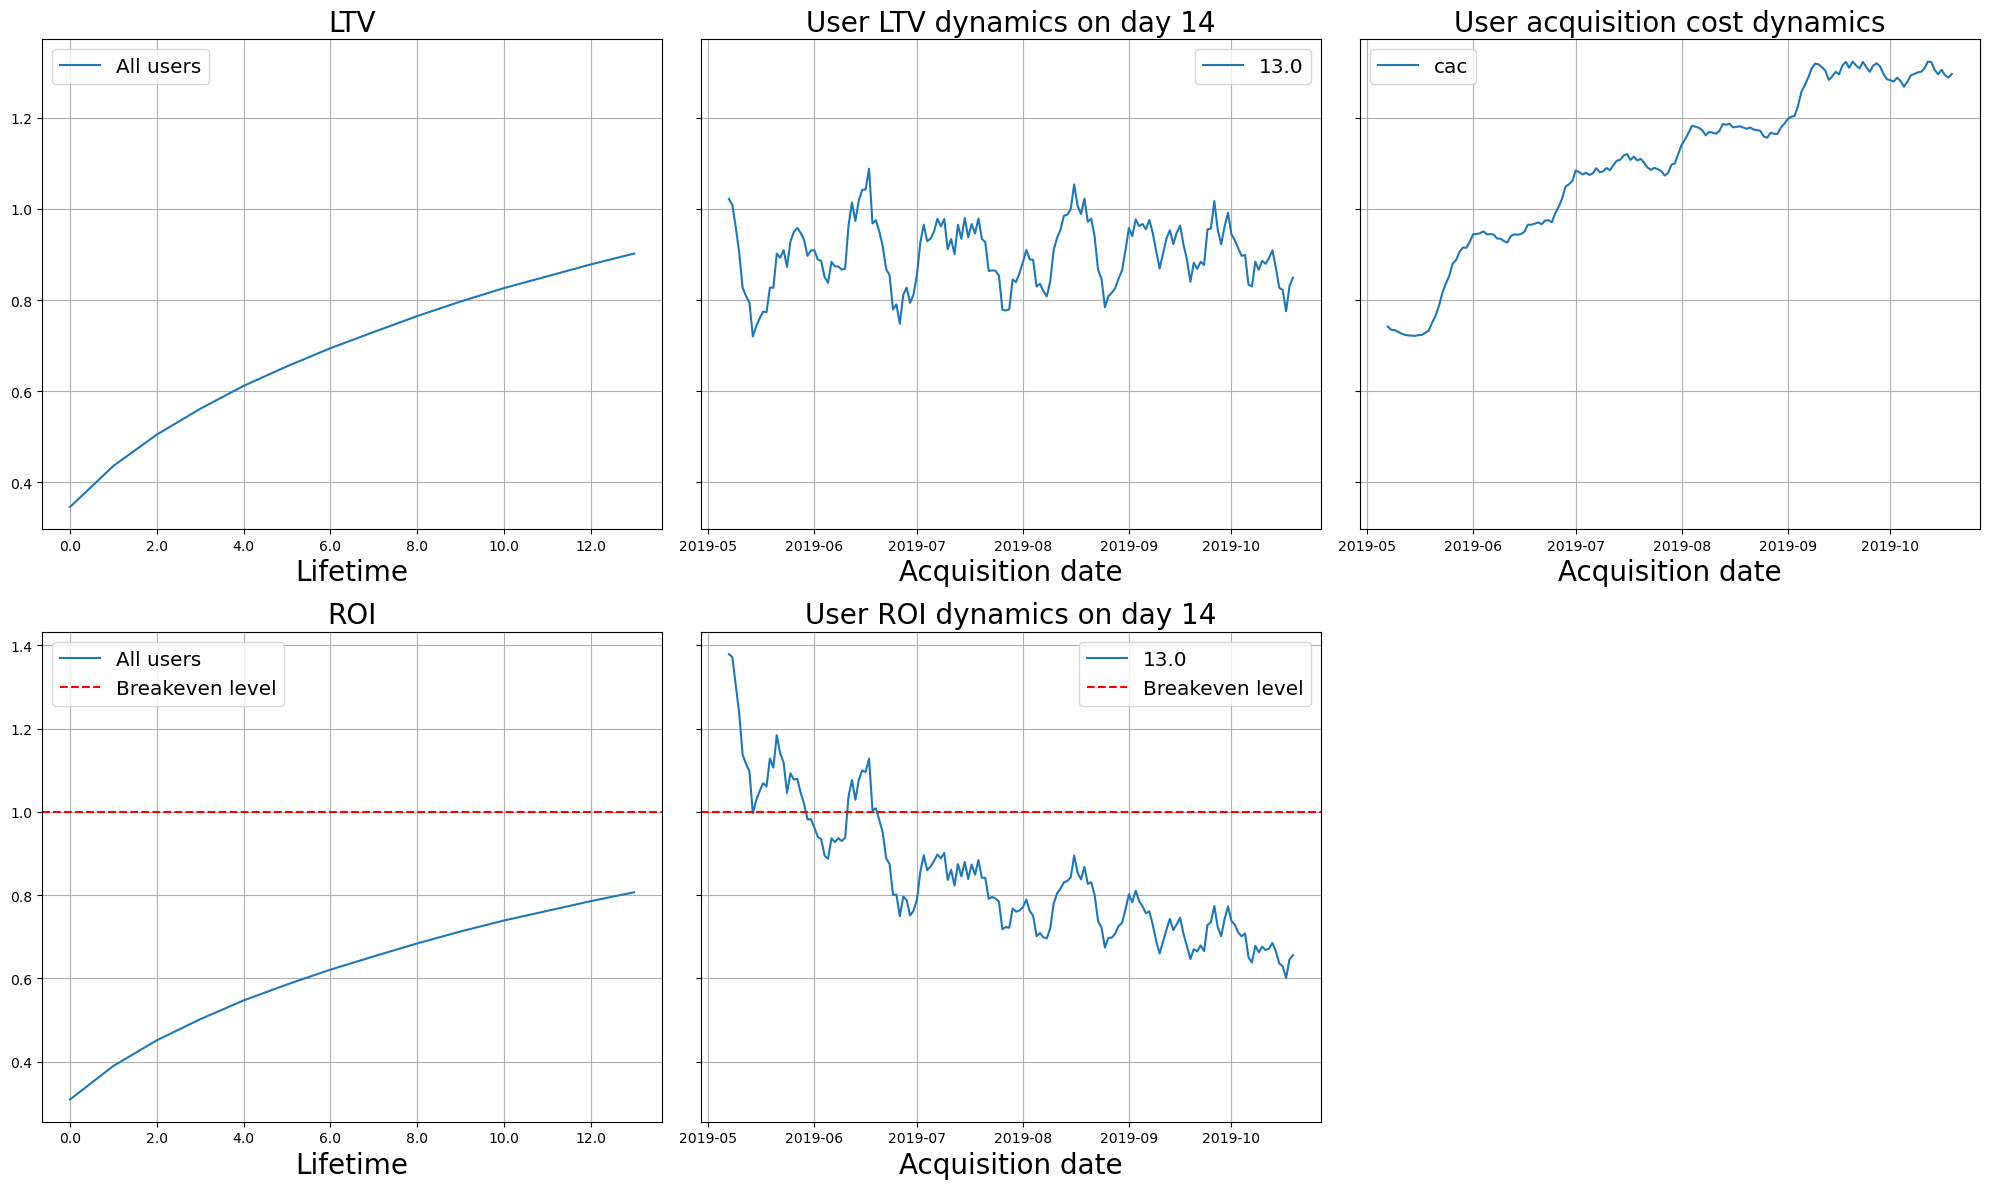

In [69]:
plot_ltv_roi(ltv, ltv_history, roi_grouped, roi_history, 14)

Let's calculate the lowest cost of attracting advertising in May 2019.


In [70]:
print('The lowest CAC in dynamics is {:.2f} dollars.'.format(roi_history['cac'].min()))

The lowest CAC in dynamics is 0.71 dollars.


***Conclusion:***

Having analyzed the overall return on advertising, we can draw the following conclusions:
- the advertising payback coefficient on the 14th day is slightly below the threshold value (ROI - 0.81), which means that the first two weeks after attracting a client are unprofitable;
- relatively stable LTV dynamics on the 14th day throughout the entire observation period (fluctuates at an average value of \\$0.9);
- the cost of attracting advertising increases every month throughout the entire observation period;
- one can observe a decreasing dynamics of advertising payback; nevertheless, one can notice that at the beginning of May to June one can observe a good payback, but due to the growing dynamics of the cost of attracting a client, advertising quickly becomes unprofitable;
- in May, the lowest cost of customer acquisition was \\$0.71.

***Recommendations:***

It is necessary to analyze the reasons for the growing cost of attracting advertising and understand what can be done to reduce its costs to May levels.


#### Advertising ROI by Device

We will analyze the payback of advertising campaigns using LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.<br>
Observation date: November 1, 2019. <br>
The payback period is 14 days.


In [71]:
dims = ['device']
d_ltv_raw, d_ltv, d_ltv_history, d_roi_grouped, d_roi_history = get_ltv(no_profiles, orders, date, horizont, dims)

In [72]:
d_roi_grouped[['cohort_size', 'cac', 13]]

cohort_size       cac      13.0
device                                  
Android        20683  1.019759  0.894425
Mac            17747  1.276219  0.729139
PC             18128  0.792724  1.054801
iPhone         32086  1.277021  0.718064

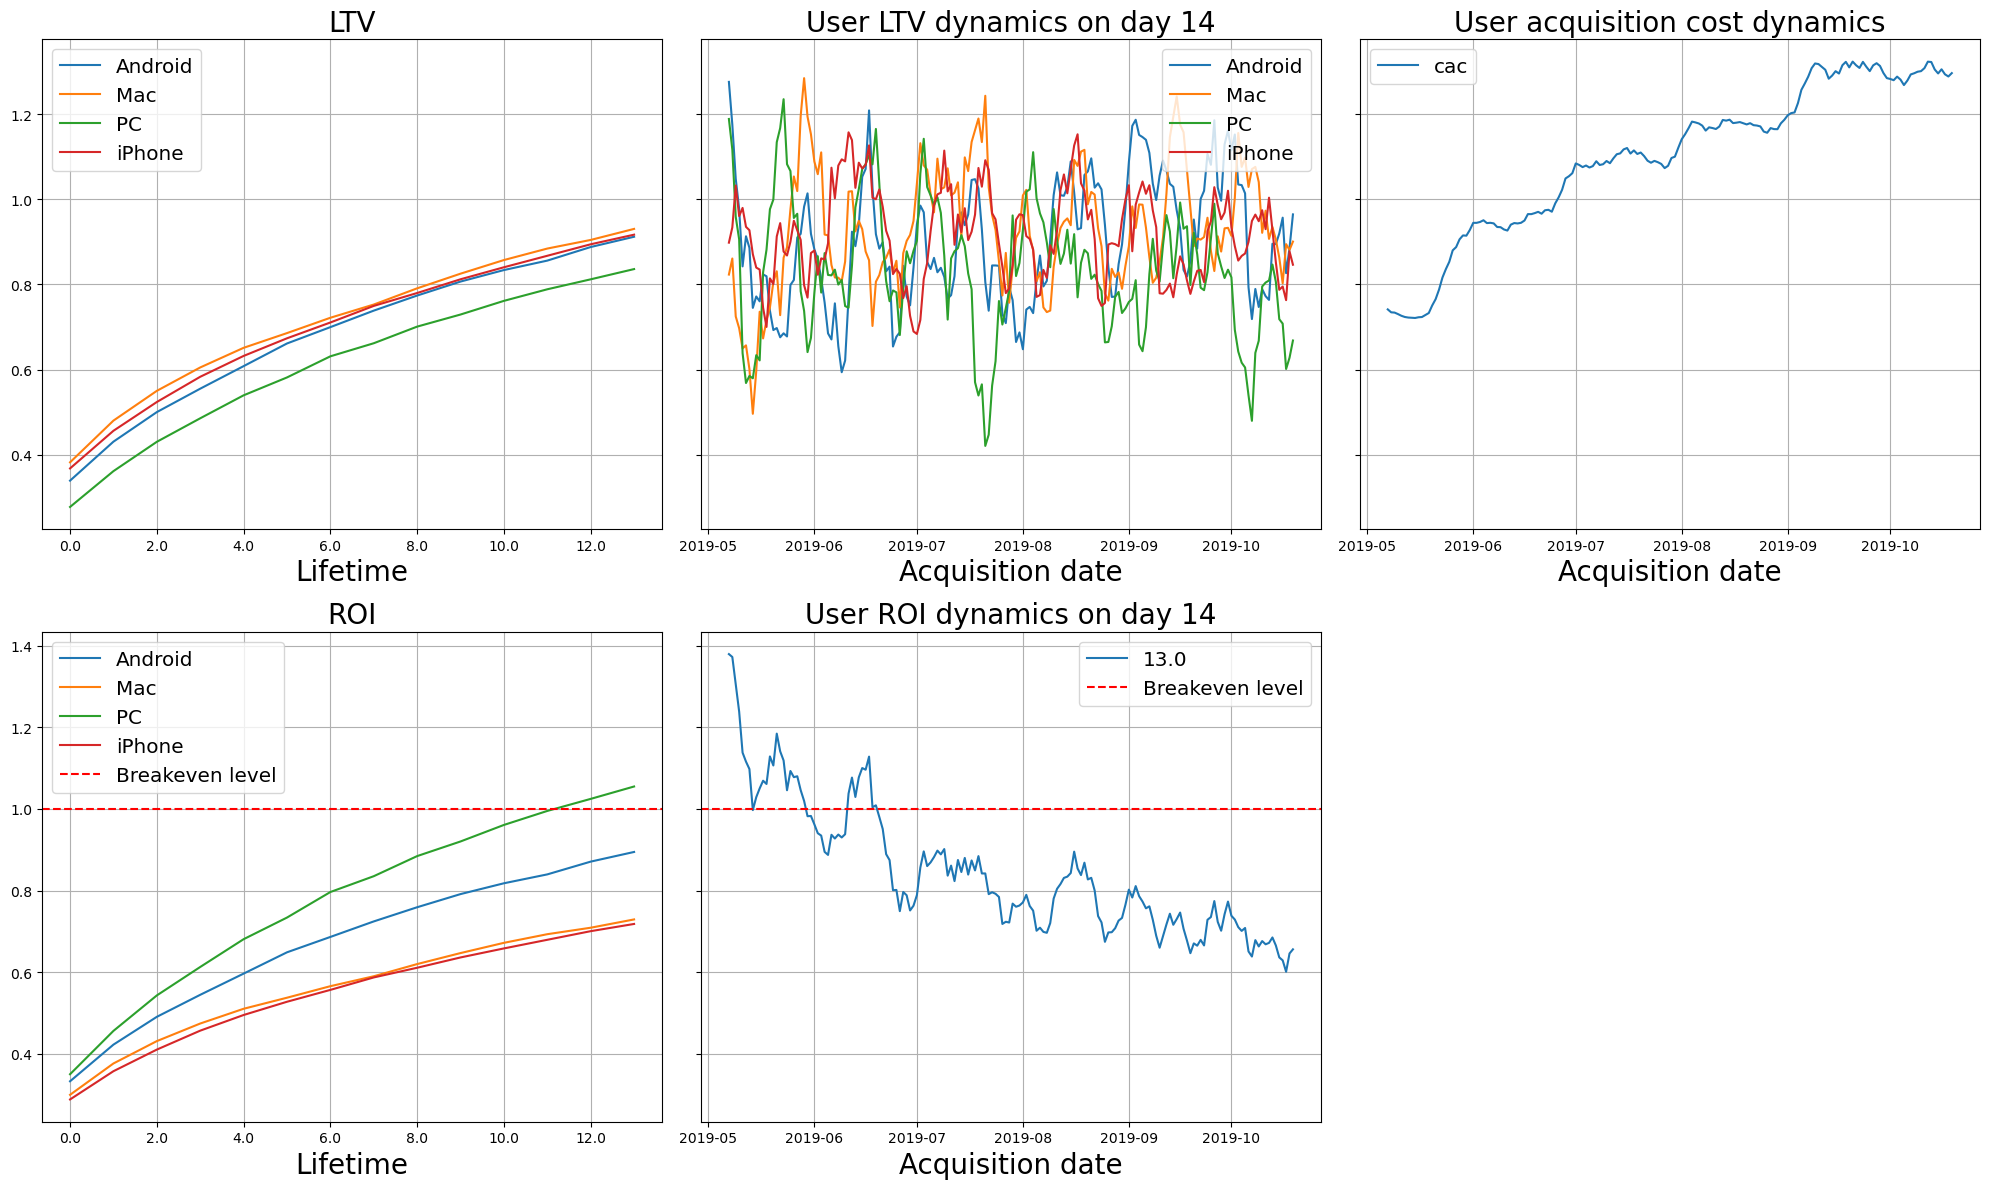

In [73]:
plot_ltv_roi(d_ltv, d_ltv_history, d_roi_grouped, roi_history, 14)

***Conclusions:***

The application is profitable only for the PC device (ROI - 1.05), however, it cannot be concluded that the payback depends on the device of use, since the graphs of the dynamics of LTV, CAC and ROI are similar in lines.

We can assume that the app's ROI is more dependent on the region and acquisition channels if we see more deviations from the average.


#### Advertising ROI by Country
We will analyze the payback by country using LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.<br>
Observation date: November 1, 2019. <br>
The payback period is 14 days.


In [74]:
dims = ['region']
r_ltv_raw, r_ltv, r_ltv_history, r_roi_grouped, r_roi_history = get_ltv(no_profiles, orders, date, horizont, dims)

In [75]:
r_roi_grouped[['cohort_size', 'cac', 13]]

cohort_size       cac      13.0
region                                        
France               10516  0.459836  1.457644
Germany               9030  0.464898  1.533709
UK                   10536  0.454922  1.634306
United States        58562  1.455876  0.687776

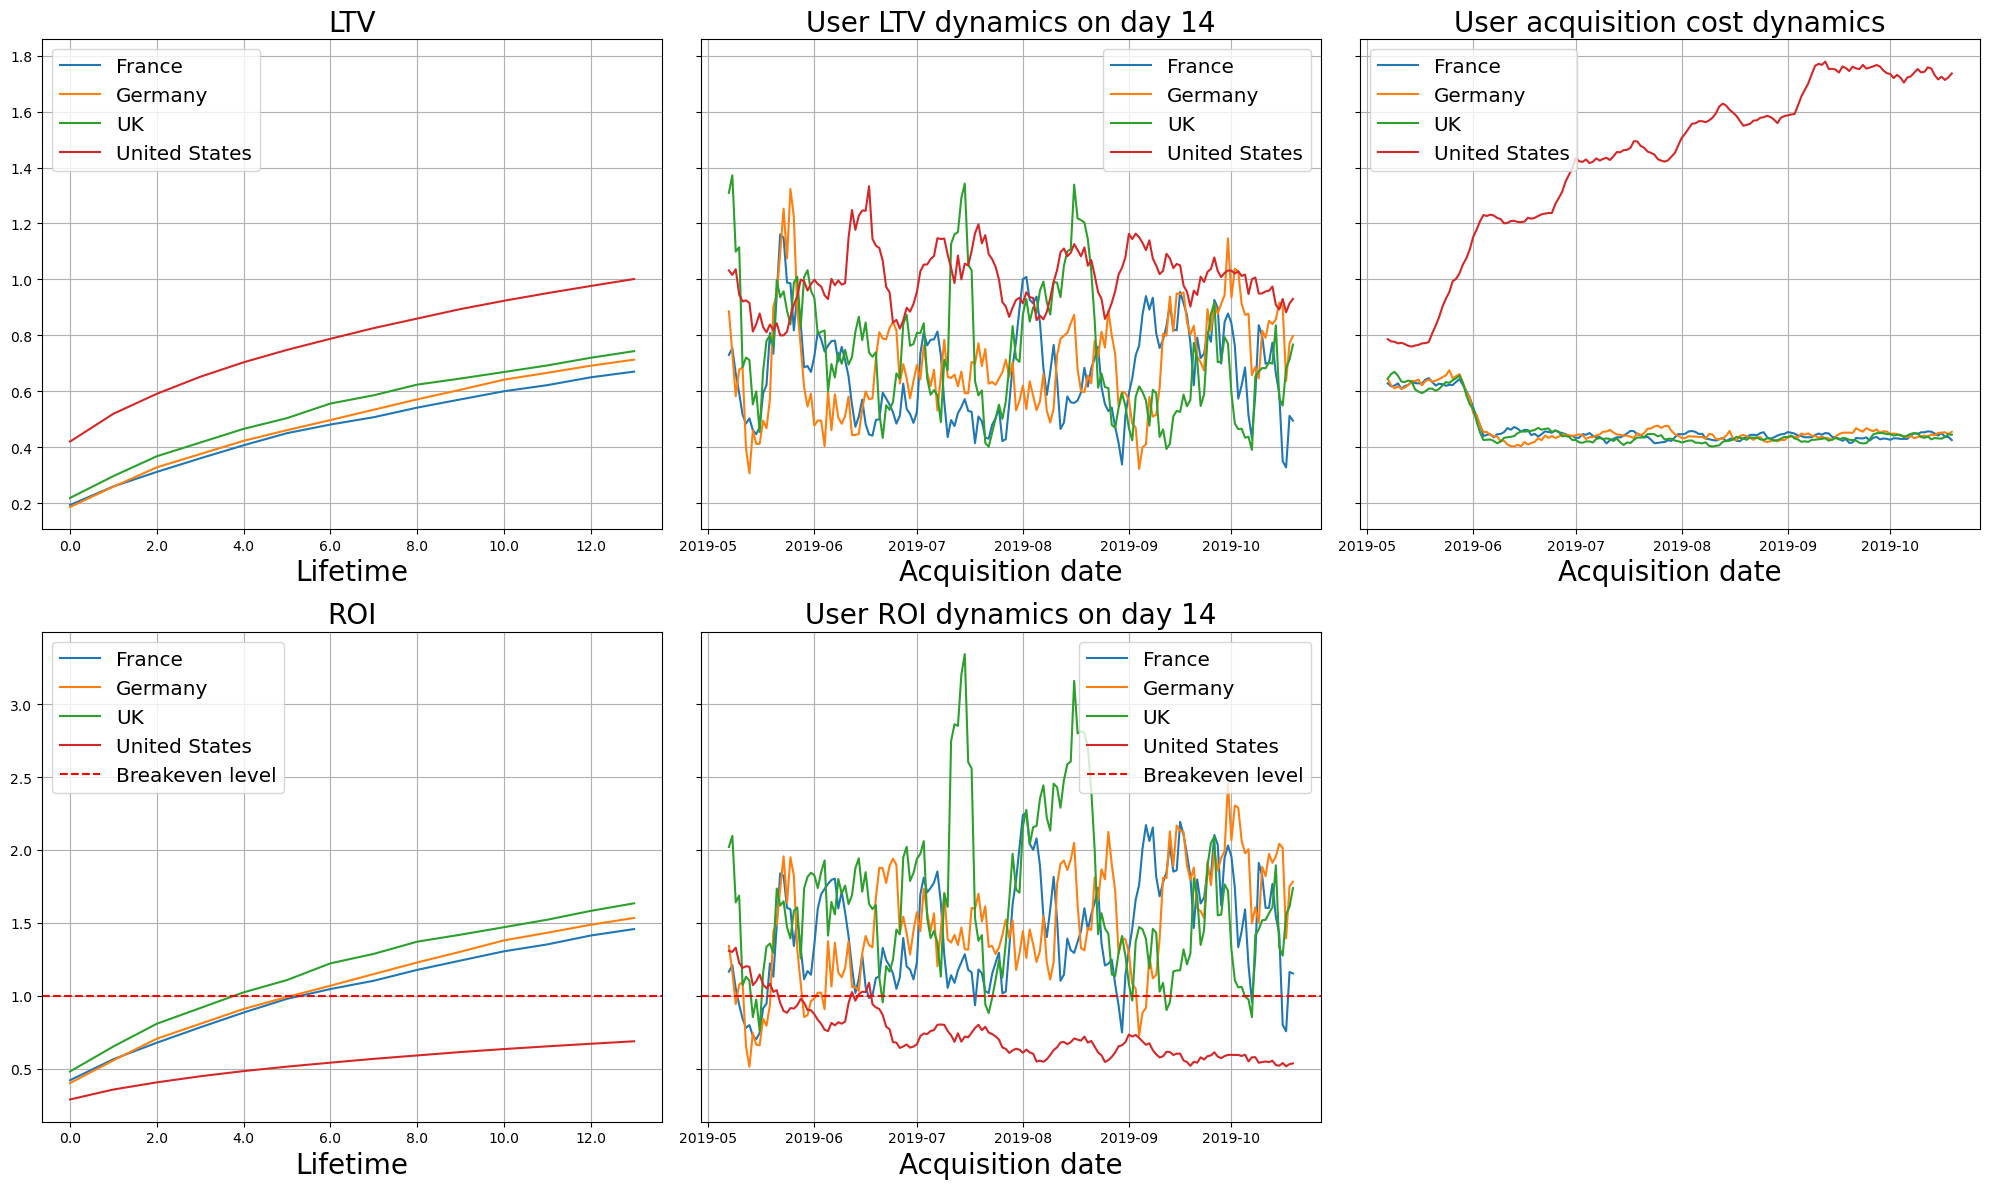

In [76]:
plot_ltv_roi(r_ltv, r_ltv_history, r_roi_grouped, r_roi_history, horizont)

***Conclusions:***

The graphs clearly show that all losses are due to the high and constantly growing cost of attracting one user from the US, since despite higher LTV values ​​than in European countries, advertising from the US is not unprofitable (ROI - 0.68). Due to the fact that the main marketing costs are in the US (86.2%), this is the main reason for the losses of the campaign.

Users from Europe are well-profitable (ROI from 1.45 to 1.63) and you can continue to expand investments in their acquisition channels.


#### Advertising ROI by Campaign in the US

Let's analyze the payback of advertising campaigns in the USA using LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.<br>
Observation date: November 1, 2019. <br>
The payback period is 14 days.


In [77]:
dims = ['channel']
profiles_usa = no_profiles.query('region == "United States"')
usa_ltv_raw, usa_ltv, usa_ltv_history, usa_roi_grouped, usa_roi_history = \
    get_ltv(profiles_usa, orders, date, horizont, dims)

In [78]:
usa_ltv_short = usa_ltv[['cohort_size', 0, 6, 13]].sort_values(by='cohort_size', ascending=False)
usa_ltv_short.style.background_gradient(subset=[0, 6, 13], axis=None)

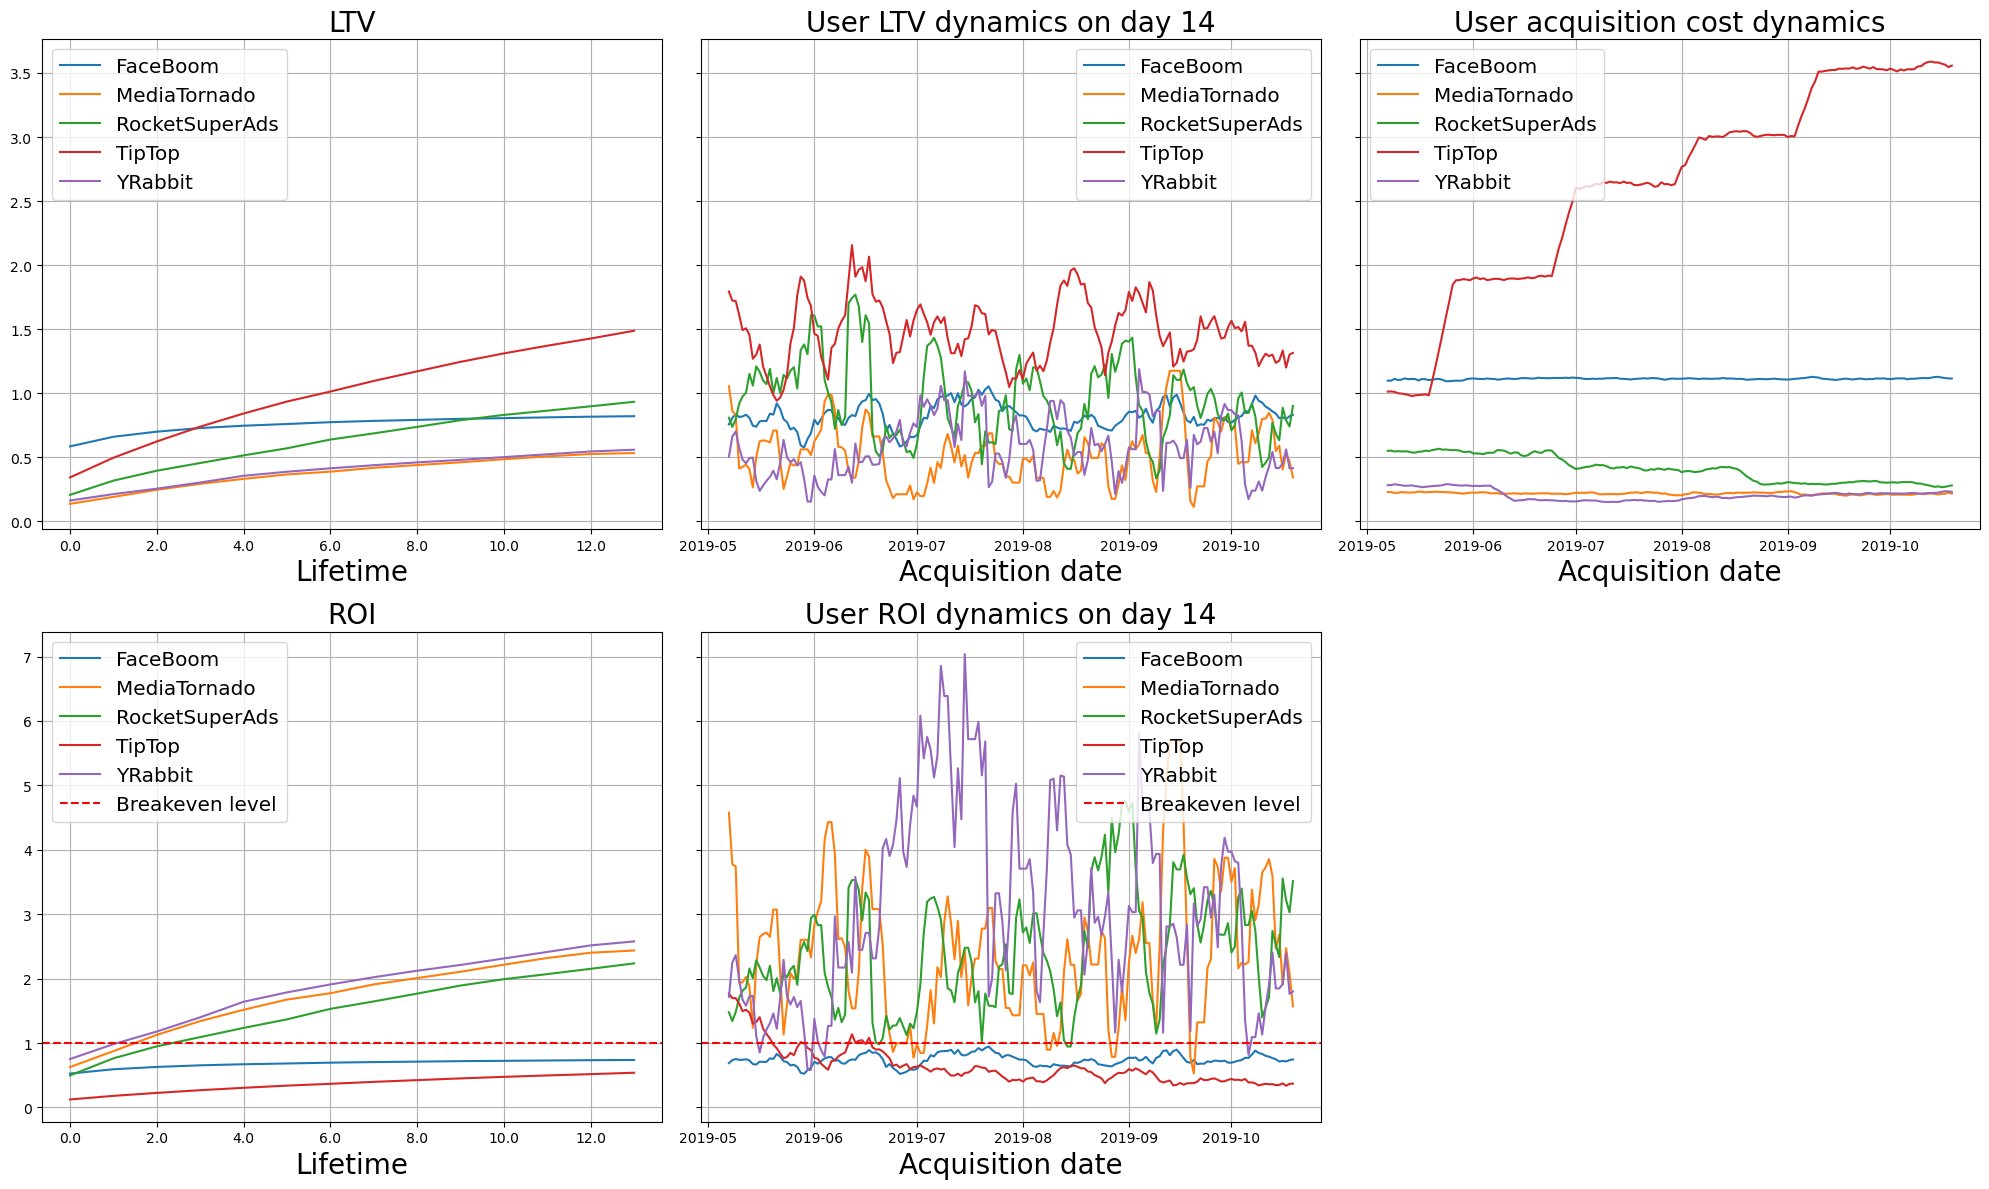

In [79]:
plot_ltv_roi(usa_ltv, usa_ltv_history, usa_roi_grouped, usa_roi_history, 14)

Having plotted the LTV and ROI graphs and the dynamics of LTV, CAC and ROI, we can notice several interesting things (first of all, we will pay attention to the advertising of `FaceBoom` and `TipTop`, since more than 80 percent of expenses are spent on these two sites):
1. The most important thing to highlight from the ROI chart is that there are only 2 sites where the ROI coefficient is below the payback level, i.e. they are unprofitable: `FaceBoom`, `TipTop`. Let's additionally derive the ROI values ​​on the 7th and 14th day for advertising campaigns to be more convinced of the unprofitability of investing in these sites.


In [80]:
usa_roi_grouped[['cohort_size', 'cac', 6, 13]] \
    .sort_values(by='cohort_size', ascending=False) \
    .style.background_gradient(subset=[6, 13])

Let's do further research and calculate the percentage of users who came from unprofitable advertising campaigns and the share of expenses on these three campaigns.


In [81]:
usa_lesion_cohort_size = usa_roi_grouped[usa_roi_grouped[13] < 1].cohort_size.sum()
usa_cohort_size = usa_roi_grouped.cohort_size.sum()
print(
    'Доля когорты пользователей, пришедших из убыточных рекламных кампаний США:', 
    (usa_lesion_cohort_size / usa_cohort_size * 100).round(2)
)

Доля когорты пользователей, пришедших из убыточных рекламных кампаний США: 78.62


The share of expenses on unprofitable advertising campaigns in the United States is about 96 percent.


In [82]:
usa_lesion_costs = channel_costs[channel_costs.index.isin(['FaceBoom','TipTop'])].costs.sum()
usa_all_costs = channel_costs[channel_costs.region == "United States"].costs.sum()
print(
    'Доля расходов на убыточные рекламные кампании:', 
    (usa_lesion_costs / usa_all_costs * 100).round(2)
)

Доля расходов на убыточные рекламные кампании: 95.9


2. If we analyze the LTV and CAC indicators in more detail, we can see that the platform and `FaceBoom` had a stable CAC for the entire six-month period, but at a high level of $1.1 per attracted client (compared to the average cost of attraction - see point 4.3); the LTV value for `FaceBoom` campaigns on the 14th day is about $0.73, which is lower than the CAC value;
3. The `TipTop` platform ranks second in LTV among other campaigns ($1.5 per client), and this trend was observed throughout the entire observation period. However, the cost of attracting a user grew exponentially every month (by $0.4-0.7 every month). Because of this, the platform, which was profitable at the beginning of May, quickly became unprofitable.
4. If we study the ROI of the two most successful advertising campaigns in the US in more detail, we can conclude that `YRabbit` and `MediaTornado` largely pay for themselves due to the low cost of user acquisition ($0.22), despite the low LTV values ​​($0.53-0.55);

Additionally, an important component of the channel's payback is the stable values ​​of the cost of acquisition, since with the LTV value, which can fluctuate greatly at the moment and the same unstable CAC, it is difficult to predict the payback of advertising.


***Conclusion:***

Having analyzed the return on advertising for advertising campaigns, we can draw the following conclusions:
- three unprofitable advertising campaigns were calculated, whose total share of users (not counting those who came organically) is 56% and whose total share of expenses on these companies is 86%: `FaceBoom`, `TipTop` and `AdNonSense`;
- the remaining campaigns can be called profitable; two campaigns are more than half the cost of attracting `WahooNetBanner` (ROI - 1.53 on day 14) and `OppleCreativeMedia` (ROI - 1.64 on day 14), the rest have an ROI indicator higher than 2.24 on day 14;
- the reasons for the unprofitability of the `FaceBoom` and `AdNonSense` campaigns are the high, albeit stable, cost of acquisition (CAC - 1-1.1 dollars), and low LTV values ​​of sales on the 14th day ($0.8);
- the reason for the unprofitability of the `TipTop` campaign, despite the good LTV of sales (second place among other campaigns), is the abnormally high cost of attraction, which grows in leaps and bounds every month;
- an important indicator for good payback is, first of all, the ratio of revenues and the cost of attracting a customer; however, with a low CAC value, there are fewer risks of non-recoupment of advertising, since the dynamics of LTV purchases is unstable throughout the entire observation period.


#### Advertising ROI by Campaign in European Countries

We will analyze the payback of advertising campaigns in Europe using LTV and ROI graphs, as well as graphs of the dynamics of LTV, CAC and ROI.<br>
Observation date: November 1, 2019. <br>
The payback period is 14 days.


In [83]:
dims = ['channel']
profiles_usa = no_profiles.query('region != "United States"')
eu_ltv_raw, eu_ltv, eu_ltv_history, eu_roi_grouped, eu_roi_history = get_ltv(profiles_usa, orders, date, horizont, dims)

In [84]:
eu_ltv_short = eu_ltv[['cohort_size', 0, 6, 13]]
eu_ltv_short.style.background_gradient(subset=[0, 6, 13], axis=None)

In [85]:
eu_roi_grouped[['cohort_size', 'cac', 13]]

cohort_size       cac      13.0
channel                                            
AdNonSense                 3702  1.008023  0.831337
LeapBob                    8103  0.210000  2.252399
OppleCreativeMedia         8139  0.249908  1.637075
WahooNetBanner             8082  0.601856  1.526304
lambdaMediaAds             2056  0.727237  2.428712

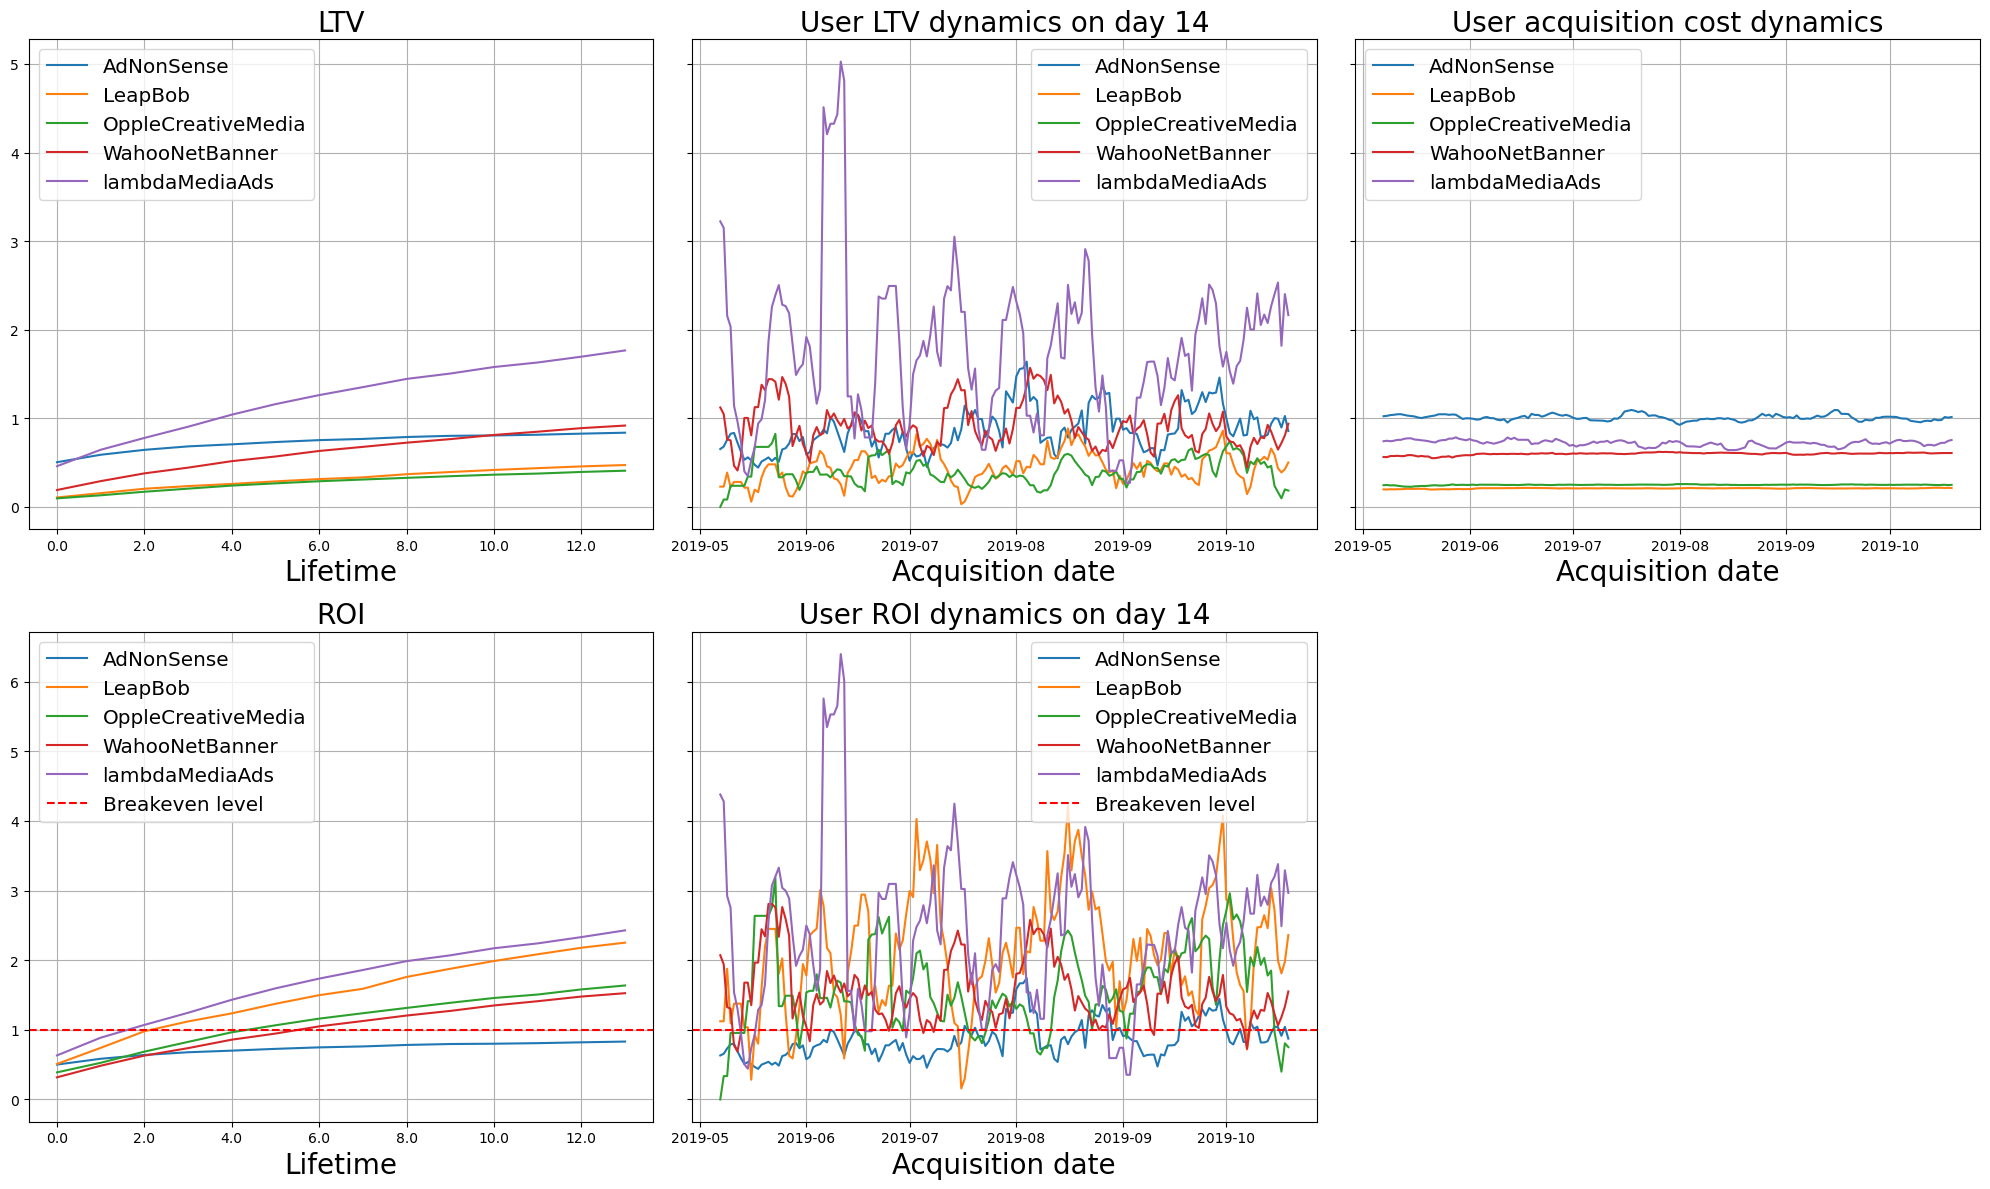

In [86]:
plot_ltv_roi(eu_ltv, eu_ltv_history, eu_roi_grouped, eu_roi_history, 14)

***Conclusion:***

Despite the good overall ROI of European advertising, there is one unprofitable channel for attracting `AdNonSense` (ROI - 0.83) due to the high cost of attracting one user ($1).

It should be noted that the payback largely depends on a stable and low cost of user acquisition, since it is impossible to say for sure from the dynamics of LTV whether it will be high in a short observation period.


#### Conversion of users into purchases


##### Overall conversion of users into purchases


Let's analyze the overall conversion of users into purchases.


In [87]:
conversion_raw, conversion, conversion_history = get_conversion(no_profiles, orders, date, horizont)

In [88]:
conversion[['cohort_size', 0, 6, 13]].round(3)

cohort_size    0.0    6.0  13.0
cohort                                    
All users        88056  0.059  0.077  0.08

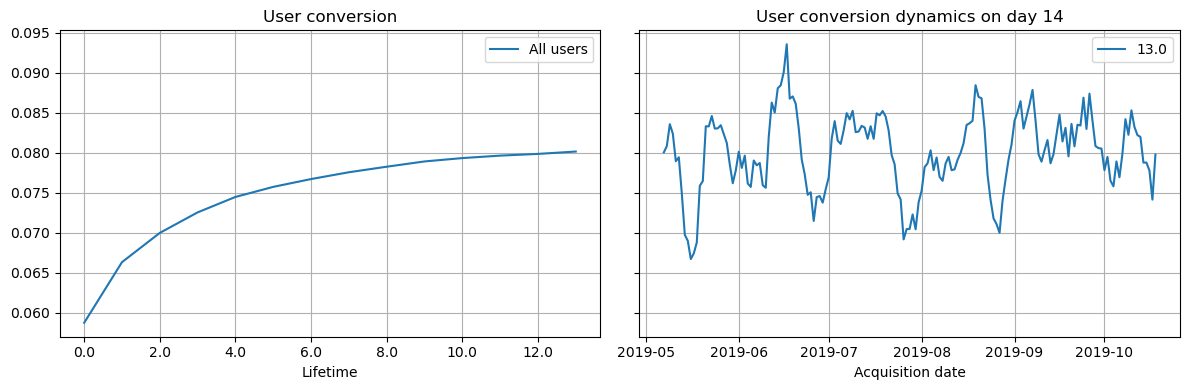

In [89]:
plot_conversion(conversion, conversion_history, horizont)

***Conclusion:***

Based on the data, the following conclusions can be drawn:
- the main share of first purchases occurs on the first day of the user’s visit to the application (5.9%);
- on the 14th day the share of purchases is 8% (3.1% more than on the first day);
- most purchases occur within the first 10 days of the visit.


##### User conversion to purchases by country


Let's analyze the overall conversion of users into purchases, broken down by country.


In [90]:
reg_conversion_raw, reg_conversion, reg_conversion_history = \
    get_conversion(profiles, orders, date, horizont, ['region'])

In [91]:
reg_conversion[['cohort_size', 0, 6, 13]].round(3)

cohort_size    0.0    6.0   13.0
region                                         
France               16524  0.024  0.035  0.037
Germany              14146  0.025  0.038  0.040
UK                   16609  0.026  0.036  0.038
United States        94430  0.049  0.064  0.067

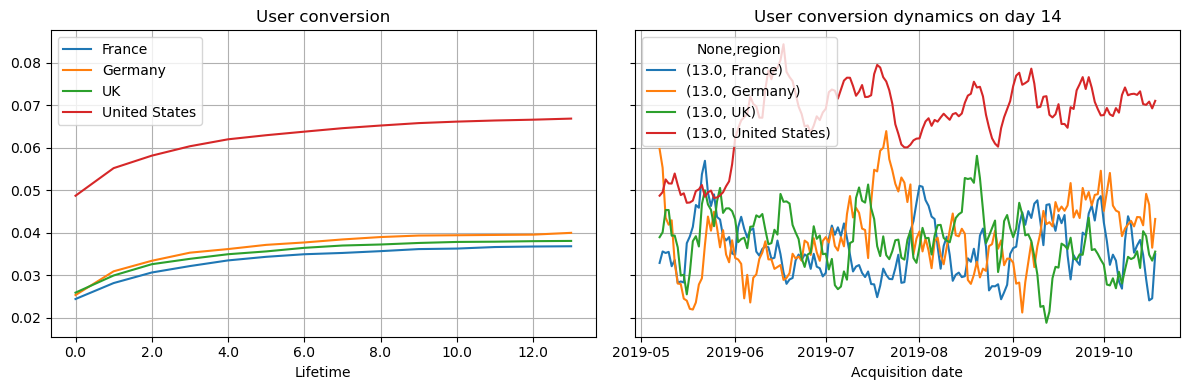

In [92]:
plot_conversion(reg_conversion, reg_conversion_history, horizont)

***Conclusion:***

Based on the data, the following conclusions can be drawn:
- by far the highest conversion rate into purchases is among users from the USA (6.7% on day 14);
- Conversion into purchases from European countries fluctuates from 3.7% to 4% on the 14th day.


##### Conversion of users to purchases by acquisition channels in the USA

Let's analyze the conversion of users into purchases by acquisition channels in the USA.


In [93]:
usa_profiles = no_profiles.query("region == 'United States'")
usa_conversion_raw, usa_conversion, usa_conversion_history = \
    get_conversion(usa_profiles, orders, date, horizont, ['channel'])

In [94]:
usa_conversion[['cohort_size', 13]].sort_values(by=13, ascending=False)

cohort_size      13.0
channel                              
FaceBoom              27349  0.119200
TipTop                18367  0.093810
RocketSuperAds         4225  0.073609
YRabbit                4077  0.037037
MediaTornado           4148  0.033510

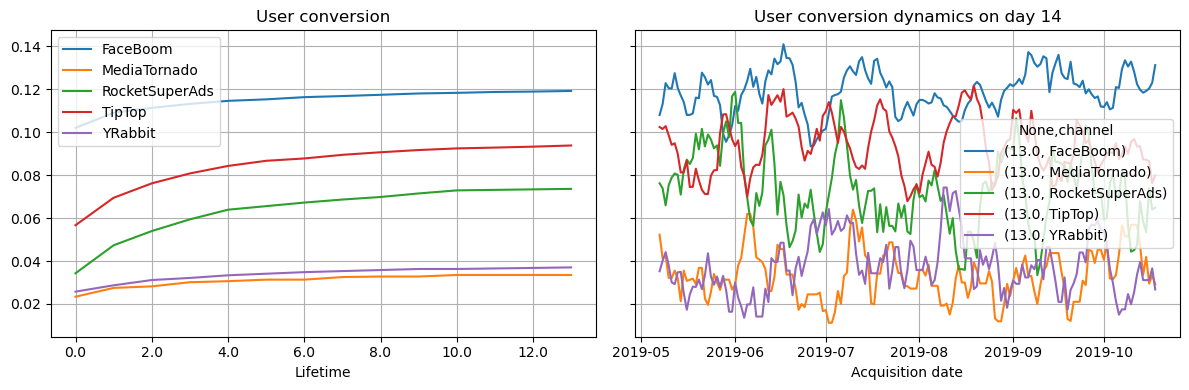

In [95]:
plot_conversion(usa_conversion, usa_conversion_history, horizont)

***Conclusion:***

Conversion of users into purchases varies greatly depending on the acquisition channel.
Users from the `FaceBoom` (12% on day 14) and `TipTop` (9.4% on day 14) channels have the highest conversion to purchases.


##### Conversion of users into purchases by acquisition channels in Europe

Let's analyze the conversion of users into purchases by acquisition channels in Europe.


In [96]:
eu_profiles = no_profiles.query("region != 'United States'")
eu_conversion_raw, eu_conversion, eu_conversion_history = \
    get_conversion(eu_profiles, orders, date, horizont, ['channel'])

In [97]:
eu_conversion[['cohort_size', 13]].sort_values(by=13, ascending=False)

cohort_size      13.0
channel                                  
AdNonSense                 3687  0.107947
lambdaMediaAds             2049  0.103953
WahooNetBanner             8029  0.051812
LeapBob                    8047  0.029079
OppleCreativeMedia         8078  0.026368

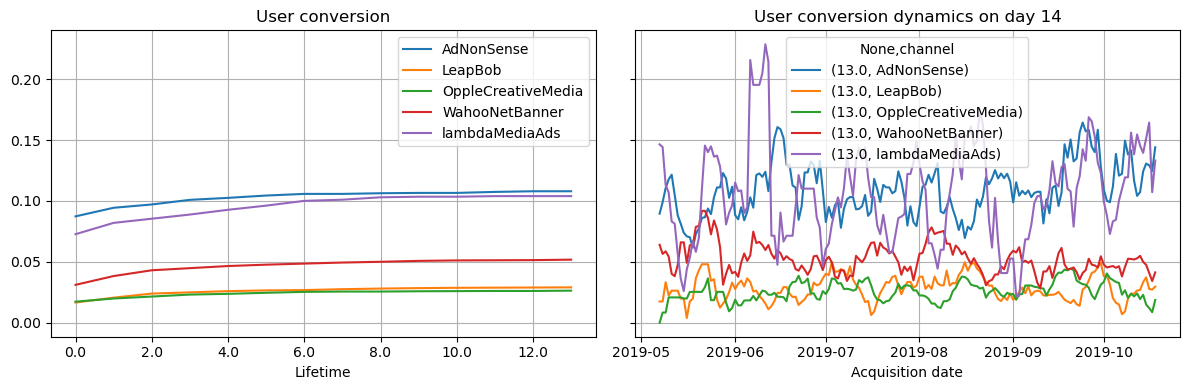

In [98]:
plot_conversion(eu_conversion, eu_conversion_history, horizont)

***Conclusion:***

Conversion of users into purchases varies greatly depending on the acquisition channel.
Users from the `AdNonSense` (10.7% on day 14) and `lambdaMediaAds` (10.4% on day 14) channels have the highest conversion to purchases.


##### Conversion of users to purchases by devices


Let's analyze the conversion of users into purchases by acquisition channels by device.


In [99]:
d_conversion_raw, d_conversion, d_conversion_history = \
    get_conversion(no_profiles, orders, date, horizont, ['device'])

In [100]:
d_conversion[['cohort_size', 13]].sort_values(by=13, ascending=False)

cohort_size      13.0
device                        
Mac            17656  0.087109
iPhone         31848  0.084872
Android        20546  0.079772
PC             18006  0.065423

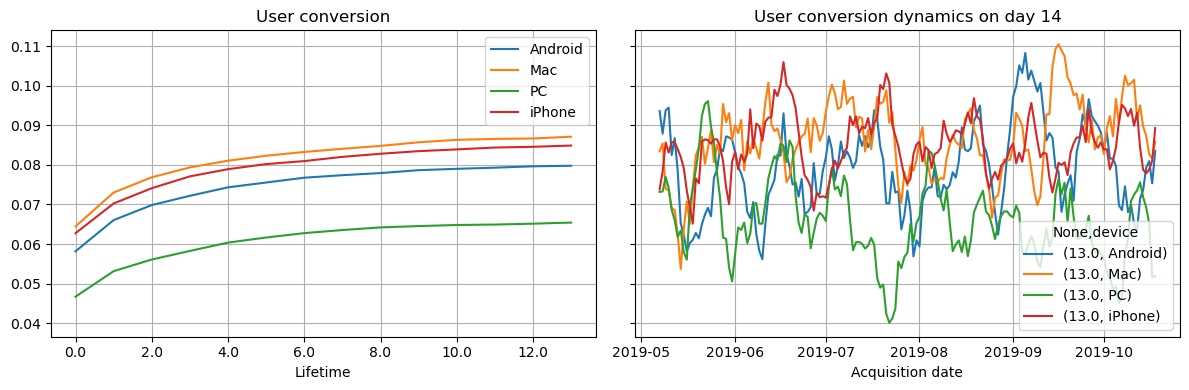

In [101]:
plot_conversion(d_conversion, d_conversion_history, horizont)

***Conclusion:***

Conversion of users into purchases does not differ much depending on the device.
The only thing is that the purchase conversion rate is relatively low for users using personal computers.


##### General conclusion on conversion

Based on the data on user conversion to purchases, the following conclusions can be made:
- The majority of first purchases occur on the first day the user visits the application (5.9%);
- On the 14th day, the share of purchases is 8% (3.1% more than on the first day);
- Most purchases occur within the first 10 days of the visit;
- By far the highest conversion rate into purchases is from users from the USA (6.7% on day 14);
- Conversion into purchases from European countries fluctuates from 3.7% to 4% on the 14th day;
- Conversion of users into purchases varies greatly depending on the acquisition channel;
- Users from `FaceBoom` (12% on day 14), `AdNonSense` (10.7% on day 14), `lambdaMediaAds` (10.4% on day 14) and `TipTop` (9.3% on day 14) channels have the highest conversion to purchases.
- Conversion of users into purchases does not differ much depending on the device. The only thing is that conversion into purchases is relatively low for users using personal computers (4.9%).


#### User Retention


##### Overall User Retention


Let's analyze the overall retention broken down by paying and non-paying users.


In [102]:
retention_raw, retention, retention_history = get_retention(no_profiles, visits, date, horizont)

In [103]:
retention[[1, 6, 13]].round(3)

1      6     13
payer                     
False  0.177  0.019  0.005
True   0.381  0.167  0.106

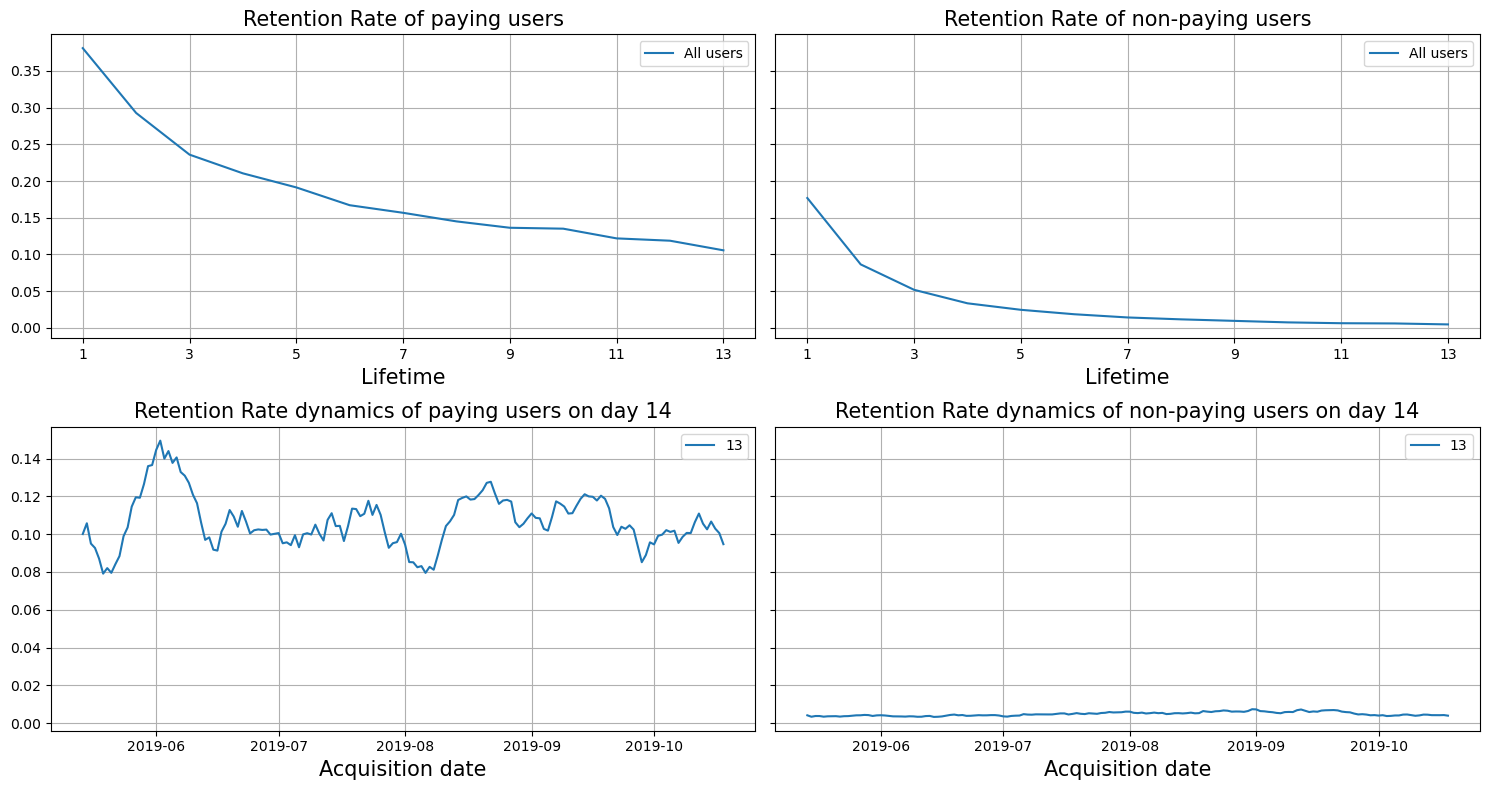

In [104]:
plot_retention(retention, retention_history, horizont)

***Conclusions:***
- Retention of users who made purchases drops to 10.6% and does not fall below 8% (in the value of a moving average with a window of 14 days);
- Retention of users who did NOT make a purchase drops to 0.5% and remains low throughout the entire observation period.


##### User retention by region


Let's analyze the overall retention broken down by paying and non-paying users and by country.


In [105]:
r_retention_raw, r_retention, r_retention_history = get_retention(no_profiles, visits, date, horizont, ['region'])

In [106]:
r_retention[['cohort_size', 13]]

cohort_size        13
payer region                              
False France                9933  0.005537
      Germany               8505  0.006584
      UK                    9937  0.004529
      United States        52422  0.004330
True  France                 521  0.174664
      Germany                464  0.135776
      UK                     530  0.179245
      United States         5744  0.090181

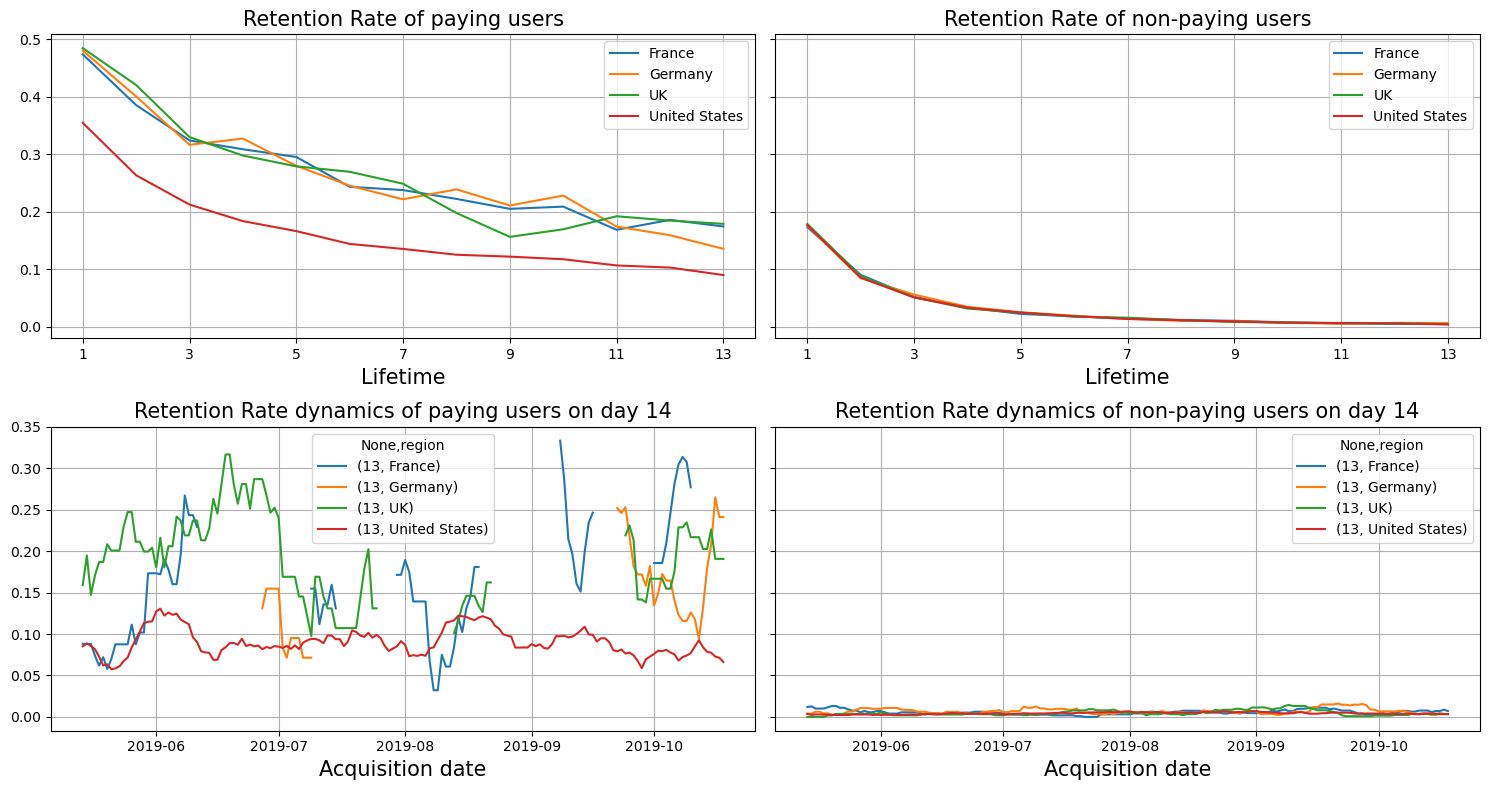

In [107]:
plot_retention(r_retention, r_retention_history, horizont)

***Conclusions:***
- Retention of users who made purchases in the US (9% retention on day 14) is lower than in European countries over the entire two-week lifetime (13.5-18% retention on day 14);
- Retention of users who did NOT make a purchase is low and similar in all regions, both in terms of lifetime and dynamics on day 14.


Despite good conversion of US users into purchases relative to European countries, US user retention is lower.


##### User Retention by Acquisition Channels in the US


Let's analyze overall retention broken down by paying and non-paying users and by acquisition channels in the US.


In [108]:
usa_retention_raw, usa_retention, usa_retention_history = \
    get_retention(usa_profiles, visits, date, horizont, ['channel'])

In [109]:
usa_retention[['cohort_size', 13]].round(3)

cohort_size     13
payer channel                           
False FaceBoom              24015  0.004
      MediaTornado           4000  0.005
      RocketSuperAds         3892  0.003
      TipTop                16593  0.004
      YRabbit                3922  0.005
True  FaceBoom               3334  0.013
      MediaTornado            148  0.122
      RocketSuperAds          333  0.222
      TipTop                 1774  0.207
      YRabbit                 155  0.103

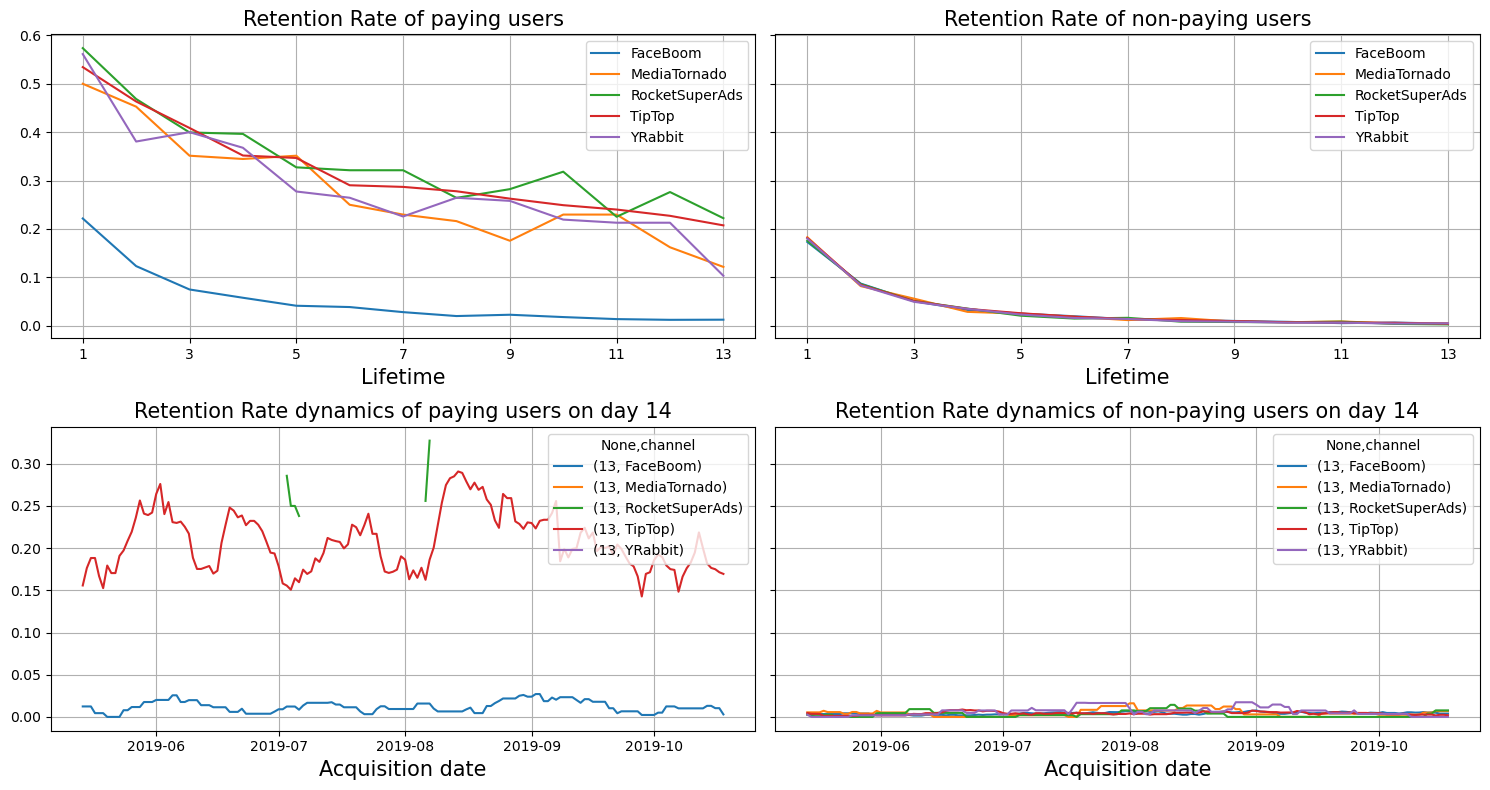

In [110]:
plot_retention(usa_retention, usa_retention_history, horizont)

***Conclusion:***

According to the data, it can be seen that the retention of paying users attracted by the `FaceBoom` acquisition channel (retention share on day 14 is 1.3%) is very low compared to other advertising campaigns on the 14th day (and even lower than retention among organic users) and the overall average for all users (retention share on day 14 is 10.6%).

It is necessary to find out the reasons for such low retention and how applications are advertised on this platform.

Because of this, we can see a slow growth in the LTV value up to day 14, despite its highest value at day 1 among other US acquisition channels and the highest conversion to purchases.


In [111]:
usa_ltv_short['diff_0_13'] = usa_ltv_short[13] - usa_ltv_short[0]
usa_ltv_short = usa_ltv_short.sort_values(by='diff_0_13', ascending=False)
usa_ltv_short.style.background_gradient(subset=[0, 6, 13], axis=None)

##### User retention by acquisition channels in Europe


In [112]:
eu_profiles = no_profiles.query("region != 'United States'")
eu_retention_raw, eu_retention, eu_retention_history = \
    get_retention(eu_profiles, visits, date, horizont, ['channel'])

In [113]:
eu_retention[[6, 13]].round(3)

6     13
payer channel                         
False AdNonSense          0.019  0.007
      LeapBob             0.019  0.005
      OppleCreativeMedia  0.019  0.006
      WahooNetBanner      0.017  0.005
      lambdaMediaAds      0.016  0.005
True  AdNonSense          0.058  0.027
      LeapBob             0.288  0.212
      OppleCreativeMedia  0.333  0.215
      WahooNetBanner      0.338  0.232
      lambdaMediaAds      0.341  0.191

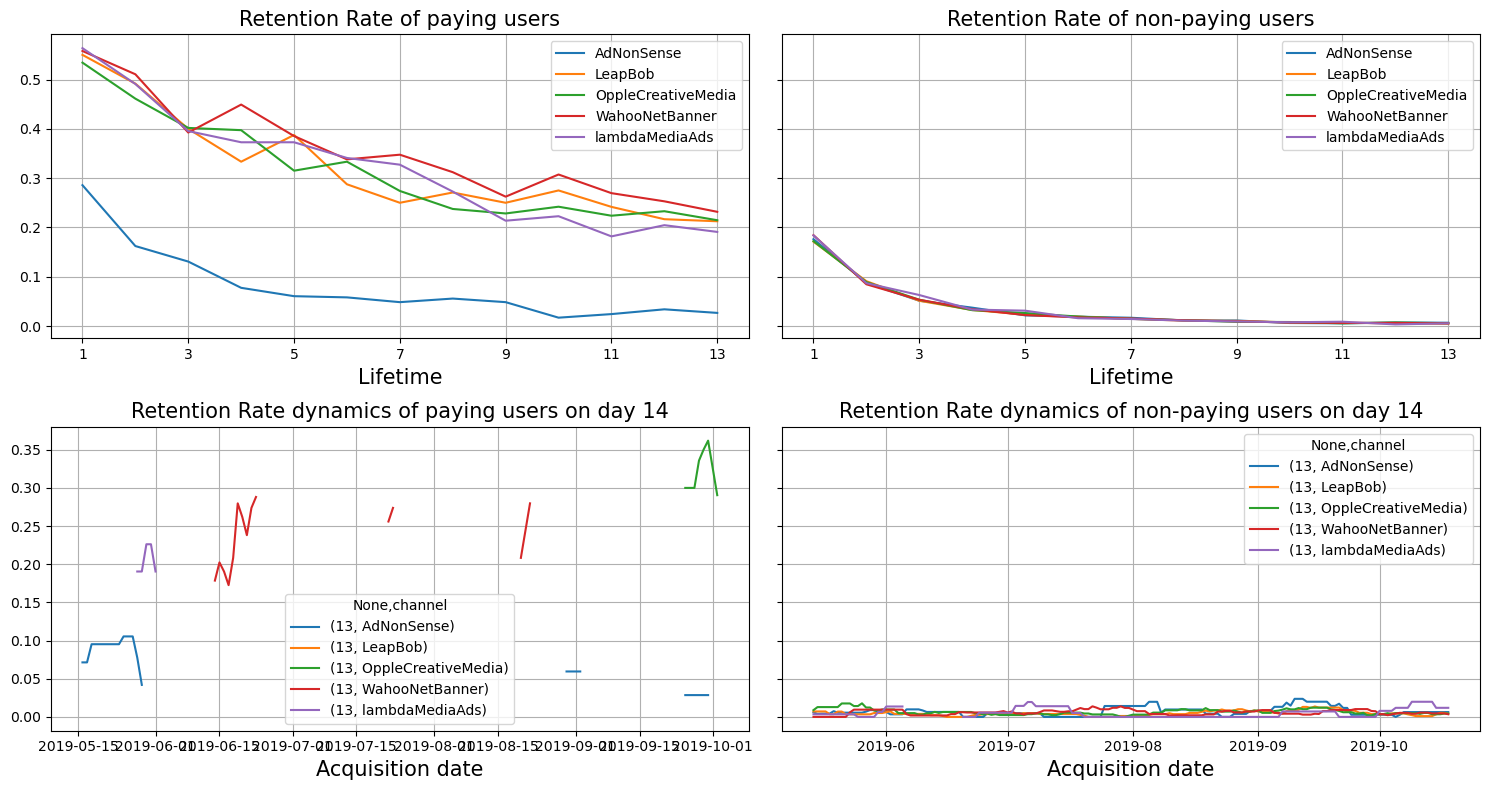

In [114]:
plot_retention(eu_retention, eu_retention_history, horizont)

***Conclusion:***

According to the data, it can be seen that the retention of paying users attracted by the AdNonSense acquisition channel (retention share on day 14 is 2.7%) is very low compared to other advertising campaigns on day 14 (and even lower than retention among organic users) and the overall average for all users (retention share on day 14 is 10.6%).

It is necessary to find out the reasons for such low retention and how applications are advertised on this platform.

Because of this, we can see a slow growth in the LTV value up to day 14, despite its highest value at day 1 among other acquisition channels in the US and the highest conversion to purchases in Europe.


In [115]:
eu_ltv_short['diff_0_13'] = eu_ltv_short[13] - eu_ltv_short[0]
eu_ltv_short = eu_ltv_short.sort_values(by='diff_0_13', ascending=False)
eu_ltv_short.style.background_gradient(subset=[0, 6, 13], axis=None)

/var/folders/dr/j4qk4lts0ng6yzjlrnb2qk5w0000gn/T/ipykernel_1200/3246571216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_ltv_short['diff_0_13'] = eu_ltv_short[13] - eu_ltv_short[0]


##### User retention by devices


In [116]:
d_retention_raw, d_retention, d_retention_history = \
    get_retention(no_profiles, visits, date, horizont, ['device'])

In [117]:
d_retention[[6, 13]]

6        13
payer device                     
False Android  0.017493  0.005089
      Mac      0.019358  0.004046
      PC       0.017792  0.005594
      iPhone   0.019339  0.004405
True  Android  0.157644  0.108269
      Mac      0.148428  0.111321
      PC       0.225645  0.124896
      iPhone   0.158235  0.092573

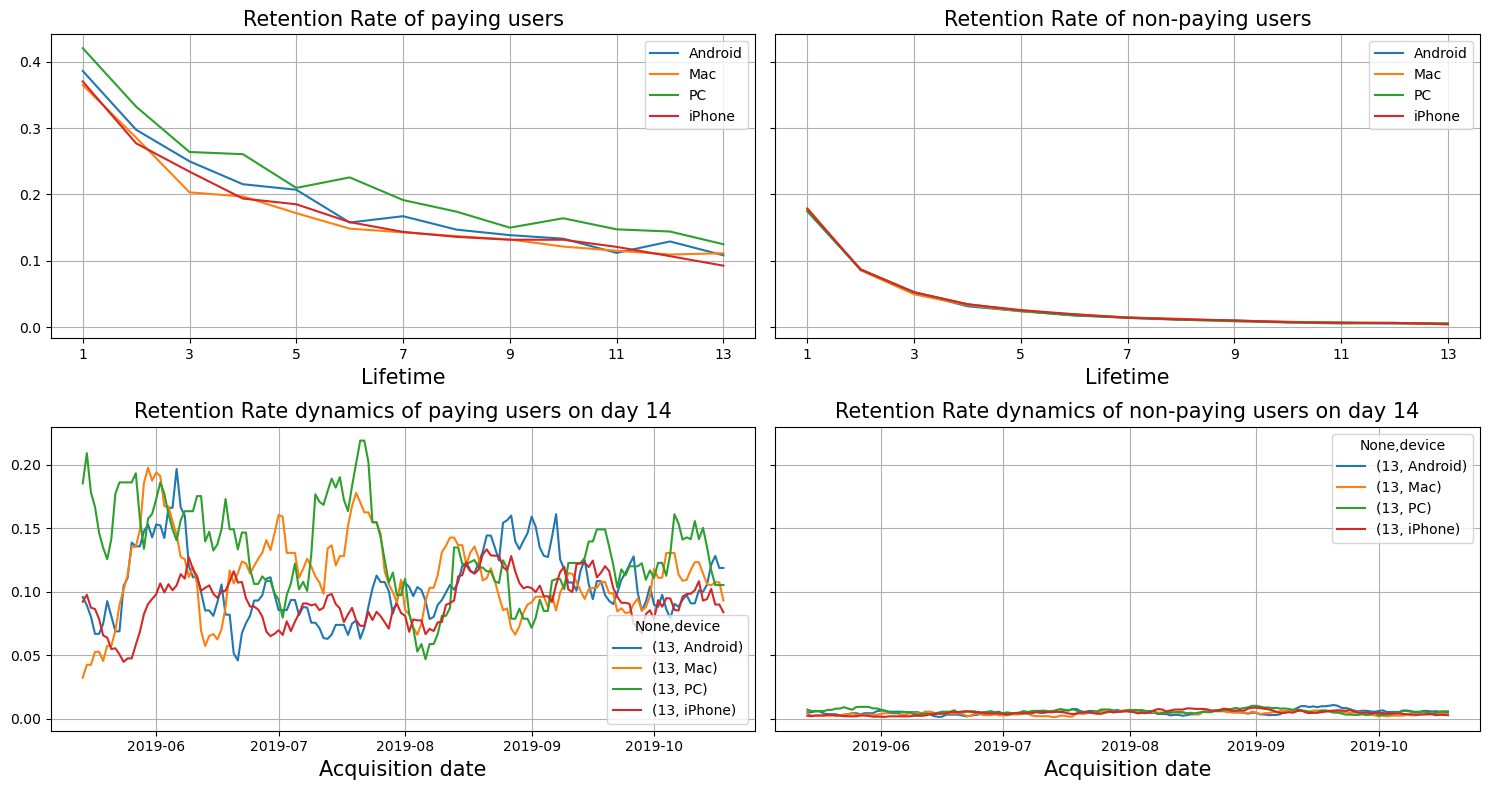

In [118]:
plot_retention(d_retention, d_retention_history, horizont)

***Conclusion:***

Retention of users in purchases does not depend much on devices, as the average values ​​fluctuate from 9.2% (iPhone) to 12.4% (PC) relative to the overall average value of 10.6%.


##### General conclusion on user retention


Based on user retention data, the following conclusions can be drawn:
- Retention of users who made purchases drops to 10.6% and does not fall below 8% (in the value of a moving average with a window of 14 days);
- Retention of users who did NOT make a purchase drops to 0.5% and remains at a low level throughout the entire dynamics;
- Retention of users who made purchases in the US (9% retention on day 14) is lower than in European countries over the entire two-week lifetime (13.5-18% retention on day 14);
- Retention of users who did NOT make a purchase is low and similar in all regions, both in terms of lifetime and dynamics on day 14.
- Retention of paying users attracted from the acquisition channels `FaceBoom` (retention share on day 14 - 1.3%) and `AdNonSense` (retention share on day 14 - 2.7%), is very low compared to other advertising campaigns (and even lower than retention of organic users) and the overall average for all users (retention share on day 14 - 10.6%);
- Low user retention from `FaceBoom` and `AdNonSense` ads resulted in low growth in LTV values ​​over 14 days, despite good performance on day 1.


### Conclusions

By analyzing data on visits, user purchases and marketing costs, we can draw the following conclusions:

<b>I. General information on advertising expenses.</b>
- Attraction channels are divided by regions: 5 channels for attracting European users (`AdNonSense`, `LeapBob`, `OppleCreativeMedia`, `WahooNetBanner`, `lambdaMediaAds`); 5 channels for attracting US users (`FaceBoom`, `TipTop`, `RocketSuperAds`, `MediaTornado`, `YRabbit`) - therefore, during the analysis, the analysis of the application's payback was done by countries of Europe and the US.
- More than 66% of users are attracted from the USA, which is quite clearly due to the fact that this country has the largest share of paying users.

<b>II. Advertising payback in the regions.</b> According to LTV, ROI and CAC by country, it was concluded that the USA is the only country where the application is unprofitable, unlike European countries, which are profitable.

<b>III. Reasons for the application's unprofitability in the USA:</b>
- Despite high LTV values ​​relative to European countries, the US also has a very high and constantly growing cost of attracting one user CAC;
- Low, but not critical, retention rate of paying users in the US (9% on day 14);
- Unprofitability of the two main acquisition channels (`FaceBoom`, `TipTop`), which account for 95.9% of all advertising expenses in the USA;

<b>IV. Unprofitability of `TipTop` advertising.</b> Despite the highest LTV rates among other US acquisition channels ($1.5 on day 14), `TipTop` is unprofitable (ROI - 0.54 on day 14) due to the high and abnormally sharply growing cost of attracting one user CAC (growth from $1 to $3.7 from the beginning of May to the end of October). It should be noted that `TipTop` was profitable at the beginning of May, when the cost of attraction was approximately $1.

<b>V. Unprofitability of `FaceBoom` and `AdNonSense` advertising.</b> These two channels have a similar picture in terms of unprofitability.
The main reason is the low retention rate of paying users on day 14. This explains the low growth of LTV values ​​(approximately $0.73 on day 14), despite good indicators on day 1 ($0.5-0.58). It is also worth noting the stable, but expensive cost of user acquisition CAC ($1-1.1), which is not covered by income from orders.

<b>VI. Advertising payback by devices.</b> According to LTV, ROI and CAC by devices, it can be concluded that among `Mac` and `iPhone` users the application is unprofitable, which is due to advertising problems in the USA compared to profitable Europe, where `Android` and `PC` are used more often.



### Recommendations

Based on the above conclusions regarding the reasons for the campaign's unprofitability, the following recommendations can be made to the marketing department:

1. It is necessary to diversify expenses for attracting new users from the US across acquisition channels, since the strong influence of 1-2 advertisements at a time can cost the unprofitability of the entire campaign;
2. It is necessary to understand the reasons for the sharply increasing cost of advertising in `TipTop` in order to try to reduce it to the figures of the beginning of May;
3. Do not attract users from `AdNonSense` and `FaceBoom` advertising campaigns due to the high, albeit stable, cost of attracting one user.
4. Invest more in advertising; advertising campaigns pay off, particularly from the US, since the share of paying users from there is higher than in European countries.
5. Before making a significant investment in new advertising campaigns, you need to determine the cost of attracting one user and compare it with the average LTV indicator for the region;
6. If you evaluate the already used acquisition channels, it is recommended to use other US channels, for example, `RocketSuperAds` due to the decreasing dynamics of the cost of acquisition CAC to the level of its competitors and high user retention on the 14th day.
7. A good alternative to `AdNonSense` advertising in Europe is `lambdaMediaAds` due to its high conversion to purchase and high LTV and ROI on day 14.
